In [1]:
import pandas as pd
import numpy as np
from optuna.integration import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import japanize_matplotlib
import optuna.integration.lightgbm as lgb_tune
from sklearn.metrics import mean_squared_error

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("data/suumo_data.csv")

In [3]:
df.head()

,name,price,age,manage,sikikin,reikin,deposit,sikibiki,line,bus,walk,time,room,area,direction,type,address
0,グラン立石,4.40,35.0,0.0,0.0,0.00,0.0,0.0,0,0,1,10.0,16,15.62,0,2,84
1,グラン立石,4.40,35.0,0.0,0.0,0.00,0.0,0.0,0,0,1,10.0,16,15.62,0,2,84
2,グレイス・コート,10.45,13.0,6000.0,0.0,10.45,0.0,0.0,1,0,1,6.0,0,33.53,8,2,60
3,東京メトロ半蔵門線 押上駅 6階建 築13年,10.45,13.0,6000.0,0.0,10.45,0.0,0.0,1,0,1,6.0,0,33.53,8,2,60
4,東京メトロ半蔵門線 押上駅 4階建 築13年,8.60,13.0,4000.0,0.0,8.60,0.0,0.0,1,0,1,7.0,1,25.95,5,2,32


In [4]:
df = df.drop("name",axis=1)

データをトレーニング用データと検証用データに分割する

In [5]:
train, test = train_test_split(df, random_state=10, test_size=0.20)

In [6]:
X = train[[col for col in train.columns if col not in ['price']]]
y = train["price"]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=10, test_size=0.20)

In [7]:
trains = lgb.Dataset(X_train, y_train)
valids = lgb.Dataset(X_val, y_val, reference=trains)

In [8]:
params = {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': 'rmse'
}


model_tune = lgb_tune.train(
    params, trains, valid_sets=[trains, valids], 
    num_boost_round=5000,
    verbose_eval=100, 
    early_stopping_rounds=100
)

[I 2022-04-18 15:38:31,510] A new study created in memory with name: no-name-15b7e2d1-aeaa-440e-b275-bece64d81b58
feature_fraction, val_score: inf:   0%|                   | 0/7 [00:00<?, ?it/s]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.240724	valid_1's rmse: 0.257885
[200]	valid_0's rmse: 0.193035	valid_1's rmse: 0.218435
[300]	valid_0's rmse: 0.173331	valid_1's rmse: 0.205211
[400]	valid_0's rmse: 0.162199	valid_1's rmse: 0.198921
[500]	valid_0's rmse: 0.154524	valid_1's rmse: 0.195137
[600]	valid_0's rmse: 0.149193	valid_1's rmse: 0.192864
[700]	valid_0's rmse: 0.145877	valid_1's rmse: 0.19147
[800]	valid_0's rmse: 0.143673	valid_1's rmse: 0.190486
[900]	valid_0's rmse: 0.141789	valid_1's rmse: 0.189859
[1000]	valid_0's rmse: 0.1

feature_fraction, val_score: 0.187939:  14%|8     | 1/7 [00:02<00:13,  2.27s/it]

[1700]	valid_0's rmse: 0.135825	valid_1's rmse: 0.187943
[1800]	valid_0's rmse: 0.135538	valid_1's rmse: 0.187988
Early stopping, best iteration is:
[1701]	valid_0's rmse: 0.135824	valid_1's rmse: 0.187939
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.240006	valid_1's rmse: 0.261828
[200]	valid_0's rmse: 0.193999	valid_1's rmse: 0.220795
[300]	valid_0's rmse: 0.173885	valid_1's rmse: 0.206426
[400]	valid_0's rmse: 0.162614	valid_1's rmse: 0.200357
[500]	valid_0's rmse: 0.155246	valid_1's rmse: 0.196679
[600]	valid_0's rmse: 0.15025	valid_1's rmse: 0.193905
[700]	valid_0's rmse: 0.14689	valid_1's rmse: 0.192809
[800]	valid_0's rmse: 0.144501	valid_1's rmse: 0.191948
[900]	valid_0's rmse: 0.142427	valid_1's rmse: 0.191248
[1000]	valid_0's rmse: 0.140981	valid_1's rmse: 0.190988
[1100]	valid_0's rmse: 0.139782	valid_1's rmse: 0.190649
[1200]	valid_0's rmse: 0.138886	valid_1's rmse: 0.190221
[1300]	valid_0's rmse: 0.138161	valid_1's rmse: 0.190095
[1400]	valid_0's rmse: 0.137533	valid_1's rmse: 0.189806
[1500]	valid_0's rmse: 0.136984	valid_1's rmse: 0.189577
[1600]	valid_0's rmse: 0.136451	valid_1's rmse: 0.189347


feature_fraction, val_score: 0.187939:  29%|#7    | 2/7 [00:04<00:11,  2.34s/it]

[1700]	valid_0's rmse: 0.136108	valid_1's rmse: 0.189417
Early stopping, best iteration is:
[1605]	valid_0's rmse: 0.136423	valid_1's rmse: 0.189308
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.241715	valid_1's rmse: 0.268151
[200]	valid_0's rmse: 0.197609	valid_1's rmse: 0.228919
[300]	valid_0's rmse: 0.176938	valid_1's rmse: 0.215855
[400]	valid_0's rmse: 0.165285	valid_1's rmse: 0.209494
[500]	valid_0's rmse: 0.157262	valid_1's rmse: 0.204763
[600]	valid_0's rmse: 0.151732	valid_1's rmse: 0.202051
[700]	valid_0's rmse: 0.14807	valid_1's rmse: 0.200519
[800]	valid_0's rmse: 0.145473	valid_1's rmse: 0.199299
[900]	valid_0's rmse: 0.143359	valid_1's rmse: 0.198411
[1000]	valid_0's rmse: 0.141701	valid_1's rmse: 0.19786
[1100]	valid_0's rmse: 0.14045	valid_1's rmse: 0.197309
[1200]	valid_0's rmse: 0.139468	valid_1's rmse: 0.197006
[1300]	valid_0's rmse: 0.138734	valid_1's rmse: 0.196931
[1400]	valid_0's rmse: 0.137962	valid_1's rmse: 0.196727
[1500]	valid_0's rmse: 0.137346	valid_1's rmse: 0.196574
[1600]	valid_0's rmse: 0.136848	valid_1's rmse: 0.196515
[1700]	valid_0's rmse: 0.136456	valid_1's rmse: 0.196515
[1800]	valid_0's rmse: 0.136069	valid_1's r

feature_fraction, val_score: 0.187939:  43%|##5   | 3/7 [00:07<00:10,  2.68s/it]

Early stopping, best iteration is:
[1765]	valid_0's rmse: 0.136199	valid_1's rmse: 0.196423
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.247568	valid_1's rmse: 0.266226
[200]	valid_0's rmse: 0.199705	valid_1's rmse: 0.225711
[300]	valid_0's rmse: 0.180884	valid_1's rmse: 0.213899
[400]	valid_0's rmse: 0.168862	valid_1's rmse: 0.207473
[500]	valid_0's rmse: 0.160175	valid_1's rmse: 0.20266
[600]	valid_0's rmse: 0.154589	valid_1's rmse: 0.20023
[700]	valid_0's rmse: 0.150824	valid_1's rmse: 0.198761
[800]	valid_0's rmse: 0.147434	valid_1's rmse: 0.197807
[900]	valid_0's rmse: 0.145056	valid_1's rmse: 0.196617
[1000]	valid_0's rmse: 0.143273	valid_1's rmse: 0.196169
[1100]	valid_0's rmse: 0.141895	valid_1's rmse: 0.195675
[1200]	valid_0's rmse: 0.140769	valid_1's rmse: 0.195267
[1300]	valid_0's rmse: 0.139768	valid_1's rmse: 0.195036
[1400]	valid_0's rmse: 0.138949	valid_1's rmse: 0.194844
[1500]	valid_0's rmse: 0.138297	valid_1's rmse: 0.194673
[1600]	valid_0's rmse: 0.137805	valid_1's rmse: 0.194683
[1700]	valid_0's rmse: 0.137301	valid_1's rmse: 0.194417
[1800]	valid_0's rmse: 0.136893	valid_1's 

feature_fraction, val_score: 0.187939:  57%|###4  | 4/7 [00:10<00:08,  2.81s/it]

Early stopping, best iteration is:
[1848]	valid_0's rmse: 0.136706	valid_1's rmse: 0.194221
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.275945	valid_1's rmse: 0.288213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's rmse: 0.220195	valid_1's rmse: 0.242648
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	valid_0's rmse: 0.197444	valid_1's rmse: 0.227701
[400]	valid_0's rmse: 0.183001	valid_1's rmse: 0.219118
[500]	valid_0's rmse: 0.173019	valid_1's rmse: 0.214444
[600]	valid_0's rmse: 0.165425	valid_1's rmse: 0.211572
[700]	valid_0's rmse: 0.159873	valid_1's rmse: 0.208851
[800]	valid_0's rmse: 0.155737	valid_1's rmse: 0.206906
[900]	valid_0's rmse: 0.152706	valid_1's rmse: 0.205982
[1000]	valid_0's rmse: 0.150071	valid_1's rmse: 0.204886
[1100]	valid_0's rmse: 0.147864	valid_1's rmse: 0.203739
[1200]	valid_0's rmse: 0.14605	valid_1's rmse: 0.203185
[1300]	valid_0's rmse: 0.144511	valid_1's rmse: 0.20255
[1400]	valid_0's rmse: 0.14324	valid_1's rmse: 0.202068
[1500]	valid_0's rmse: 0.142277	valid_1's rmse: 0.201744
[1600]	

feature_fraction, val_score: 0.187939:  71%|####2 | 5/7 [00:15<00:07,  3.58s/it]

Early stopping, best iteration is:
[2690]	valid_0's rmse: 0.136597	valid_1's rmse: 0.200031
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.252097	valid_1's rmse: 0.272108
[200]	valid_0's rmse: 0.204958	valid_1's rmse: 0.230559
[300]	valid_0's rmse: 0.183923	valid_1's rmse: 0.216227
[400]	valid_0's rmse: 0.171115	valid_1's rmse: 0.208358
[500]	valid_0's rmse: 0.162928	valid_1's rmse: 0.20447
[600]	valid_0's rmse: 0.157333	valid_1's rmse: 0.202659
[700]	valid_0's rmse: 0.152845	valid_1's rmse: 0.201055
[800]	valid_0's rmse: 0.149563	valid_1's rmse: 0.200056
[900]	valid_0's rmse: 0.146862	valid_1's rmse: 0.198842
[1000]	valid_0's rmse: 0.145087	valid_1's rmse: 0.198127
[1100]	valid_0's rmse: 0.143422	valid_1's rmse: 0.197594
[1200]	valid_0's rmse: 0.141929	valid_1's rmse: 0.196984
[1300]	valid_0's rmse: 0.140858	valid_1's rmse: 0.196862
[1400]	valid_0's rmse: 0.139918	valid_1's rmse: 0.196621
[1500]	valid_0's rmse: 0.139117	valid_1's rmse: 0.196343
[1600]	valid_0's rmse: 0.138474	valid_1's rmse: 0.196128
[1700]	valid_0's rmse: 0.137903	valid_1's rmse: 0.196077
[1800]	valid_0's rmse: 0.13743	valid_1's 

feature_fraction, val_score: 0.187939:  86%|#####1| 6/7 [00:17<00:03,  3.13s/it]

Early stopping, best iteration is:
[1869]	valid_0's rmse: 0.137122	valid_1's rmse: 0.195846
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.240878	valid_1's rmse: 0.261367
[200]	valid_0's rmse: 0.194999	valid_1's rmse: 0.222508
[300]	valid_0's rmse: 0.176138	valid_1's rmse: 0.209039
[400]	valid_0's rmse: 0.163785	valid_1's rmse: 0.201863
[500]	valid_0's rmse: 0.155971	valid_1's rmse: 0.197783
[600]	valid_0's rmse: 0.150363	valid_1's rmse: 0.195065
[700]	valid_0's rmse: 0.146926	valid_1's rmse: 0.193919
[800]	valid_0's rmse: 0.144612	valid_1's rmse: 0.1935
[900]	valid_0's rmse: 0.14261	valid_1's rmse: 0.193024
[1000]	valid_0's rmse: 0.140967	valid_1's rmse: 0.192334
[1100]	valid_0's rmse: 0.139804	valid_1's rmse: 0.192228
[1200]	valid_0's rmse: 0.13889	valid_1's rmse: 0.192196
[1300]	valid_0's rmse: 0.138204	valid_1's rmse: 0.192035


feature_fraction, val_score: 0.187939: 100%|######| 7/7 [00:19<00:00,  2.80s/it]


[1400]	valid_0's rmse: 0.137611	valid_1's rmse: 0.192019
Early stopping, best iteration is:
[1338]	valid_0's rmse: 0.137958	valid_1's rmse: 0.191987


num_leaves, val_score: 0.187939:   0%|                   | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.178576	valid_1's rmse: 0.243111
[200]	valid_0's rmse: 0.150628	valid_1's rmse: 0.209362
[300]	valid_0's rmse: 0.141984	valid_1's rmse: 0.201681
[400]	valid_0's rmse: 0.138358	valid_1's rmse: 0.199706
[500]	valid_0's rmse: 0.136443	valid_1's rmse: 0.198813
[600]	valid_0's rmse: 0.13533	valid_1's rmse: 0.198284
[700]	valid_0's rmse: 0.134707	valid_1's rmse: 0.197943
[800]	valid_0's rmse: 0.134305	valid_1's rmse: 0.19774
[900]	valid_0's rmse: 0.134006	valid_1's rmse: 0.197598
[1000]	valid_0's rmse: 0.133794	valid_1's rmse: 0.197584
[1100]	valid_0's rmse: 0.133619	valid_1's rmse: 0.197605
Early stopping, best iteration is:
[1045]	valid_0's rmse: 0.133703	valid_1's rmse: 0.197555


num_leaves, val_score: 0.187939:   5%|5          | 1/20 [00:05<01:44,  5.48s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.178353	valid_1's rmse: 0.245855
[200]	valid_0's rmse: 0.150048	valid_1's rmse: 0.214585
[300]	valid_0's rmse: 0.141852	valid_1's rmse: 0.207424
[400]	valid_0's rmse: 0.138474	valid_1's rmse: 0.204713
[500]	valid_0's rmse: 0.136528	valid_1's rmse: 0.203568
[600]	valid_0's rmse: 0.135379	valid_1's rmse: 0.202829
[700]	valid_0's rmse: 0.134734	valid_1's rmse: 0.202462
[800]	valid_0's rmse: 0.134288	valid_1's rmse: 0.202148
[900]	valid_0's rmse: 0.133997	valid_1's rmse: 0.201978
[1000]	valid_0's rmse: 0.

num_leaves, val_score: 0.187939:  10%|#1         | 2/20 [00:12<01:55,  6.41s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.176778	valid_1's rmse: 0.243645
[200]	valid_0's rmse: 0.149434	valid_1's rmse: 0.212947
[300]	valid_0's rmse: 0.14125	valid_1's rmse: 0.205882
[400]	valid_0's rmse: 0.137831	valid_1's rmse: 0.203492
[500]	valid_0's rmse: 0.136113	valid_1's rmse: 0.202552
[600]	valid_0's rmse: 0.135157	valid_1's rmse: 0.202028
[700]	valid_0's rmse: 0.134565	valid_1's rmse: 0.201782
[800]	valid_0's rmse: 0.134206	valid_1's rmse: 0.201686
[900]	valid_0's rmse: 0.13393	valid_1's rmse: 0.201619
[1000]	valid_0's rmse: 0.13

num_leaves, val_score: 0.187939:  15%|#6         | 3/20 [00:19<01:50,  6.50s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.177832	valid_1's rmse: 0.238801
[200]	valid_0's rmse: 0.151297	valid_1's rmse: 0.209876
[300]	valid_0's rmse: 0.142464	valid_1's rmse: 0.20325
[400]	valid_0's rmse: 0.138652	valid_1's rmse: 0.201311
[500]	valid_0's rmse: 0.136655	valid_1's rmse: 0.200338
[600]	valid_0's rmse: 0.1355	valid_1's rmse: 0.199736
[700]	valid_0's rmse: 0.134852	valid_1's rmse: 0.199329
[800]	valid_0's rmse: 0.134386	valid_1's rmse: 0.199264
[900]	valid_0's rmse: 0.13406	valid_1's rmse: 0.199178
[1000]	valid_0's rmse: 0.133806	valid_1's rmse: 0.199137
[1100]	valid_0's rmse: 0.13361	valid

num_leaves, val_score: 0.187939:  20%|##2        | 4/20 [00:24<01:34,  5.92s/it]

Early stopping, best iteration is:
[1085]	valid_0's rmse: 0.133629	valid_1's rmse: 0.199063
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.176757	valid_1's rmse: 0.241281
[200]	valid_0's rmse: 0.149285	valid_1's rmse: 0.210403
[300]	valid_0's rmse: 0.141037	valid_1's rmse: 0.203154
[400]	valid_0's rmse: 0.137816	valid_1's rmse: 0.201071
[500]	valid_0's rmse: 0.136162	valid_1's rmse: 0.199957
[600]	valid_0's rmse: 0.135234	valid_1's rmse: 0.199503
[700]	valid_0's rmse: 0.134571	valid_1's rmse: 0.19914
[800]	valid_0's rmse: 0.134162	valid_1's rmse: 0.199076
[900]	valid_0's rmse: 0.133883	valid_1's rmse: 0.199014
[1000]	valid_0's rmse: 0.133666	valid_1's rmse: 0.198891
[1100]	valid_0's rmse: 0.133497	valid_1's rmse: 0.198781
[1200]	valid_0's rmse: 0.133368	valid_1's rmse: 0.198714
[1300]	valid_0's rmse: 0.133279	valid_1's rmse: 0.198687
Early stopping, best iteration is:
[1272]	valid_0's rmse: 0.1333	valid_1's rmse: 0.198668


num_leaves, val_score: 0.187939:  25%|##7        | 5/20 [00:32<01:43,  6.89s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.177613	valid_1's rmse: 0.242875
[200]	valid_0's rmse: 0.149939	valid_1's rmse: 0.210976
[300]	valid_0's rmse: 0.141427	valid_1's rmse: 0.202383
[400]	valid_0's rmse: 0.137838	valid_1's rmse: 0.199902
[500]	valid_0's rmse: 0.136047	valid_1's rmse: 0.19899
[600]	valid_0's rmse: 0.135092	valid_1's rmse: 0.198473
[700]	valid_0's rmse: 0.134498	valid_1's rmse: 0.198104
[800]	valid_0's rmse: 0.134122	valid_1's rmse: 0.198003
[900]	valid_0's rmse: 0.13385	valid_1's rmse: 0.197924
[1000]	valid_0's rmse: 0.13

num_leaves, val_score: 0.187939:  30%|###3       | 6/20 [00:38<01:31,  6.56s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.17897	valid_1's rmse: 0.244918
[200]	valid_0's rmse: 0.149398	valid_1's rmse: 0.210223
[300]	valid_0's rmse: 0.141146	valid_1's rmse: 0.202451
[400]	valid_0's rmse: 0.137583	valid_1's rmse: 0.199741
[500]	valid_0's rmse: 0.135965	valid_1's rmse: 0.198926
[600]	valid_0's rmse: 0.135104	valid_1's rmse: 0.19855
[700]	valid_0's rmse: 0.134532	valid_1's rmse: 0.198382
[800]	valid_0's rmse: 0.134159	valid_1's rmse: 0.198251
[900]	valid_0's rmse: 0.133912	valid_1's rmse: 0.198124
[1000]	valid_0's rmse: 0.13

num_leaves, val_score: 0.187939:  35%|###8       | 7/20 [00:45<01:28,  6.79s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.178834	valid_1's rmse: 0.245032
[200]	valid_0's rmse: 0.149876	valid_1's rmse: 0.211542
[300]	valid_0's rmse: 0.141316	valid_1's rmse: 0.203538
[400]	valid_0's rmse: 0.137789	valid_1's rmse: 0.201385
[500]	valid_0's rmse: 0.136113	valid_1's rmse: 0.200393
[600]	valid_0's rmse: 0.135183	valid_1's rmse: 0.199884
[700]	valid_0's rmse: 0.134658	valid_1's rmse: 0.199565
[800]	valid_0's rmse: 0.134353	valid_1's rmse: 0.199385
[900]	valid_0's rmse: 0.134042	valid_1's rmse: 0.199166
[1000]	valid_0's rmse: 0.

num_leaves, val_score: 0.187939:  40%|####4      | 8/20 [00:53<01:24,  7.08s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.272538	valid_1's rmse: 0.288301
[200]	valid_0's rmse: 0.217065	valid_1's rmse: 0.241258
[300]	valid_0's rmse: 0.19241	valid_1's rmse: 0.223531
[400]	valid_0's rmse: 0.176786	valid_1's rmse: 0.213315
[500]	valid_0's rmse: 0.167679	valid_1's rmse: 0.208608
[600]	valid_0's rmse: 0.160051	valid_1's rmse: 0.20496
[700]	valid_0's rmse: 0.155113	valid_1's rmse: 0.202513
[800]	valid_0's rmse: 0.151252	valid_1's rmse: 0.201067
[900]	valid_0's rmse: 0.148353	valid_1's rmse: 0.199898
[1000]	valid_0's rmse: 0.14

num_leaves, val_score: 0.187939:  45%|####9      | 9/20 [00:55<00:59,  5.39s/it]

[1700]	valid_0's rmse: 0.138331	valid_1's rmse: 0.197159
[1800]	valid_0's rmse: 0.137813	valid_1's rmse: 0.197103
Early stopping, best iteration is:
[1746]	valid_0's rmse: 0.138063	valid_1's rmse: 0.197005
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.175915	valid_1's rmse: 0.241648
[200]	valid_0's rmse: 0.148703	valid_1's rmse: 0.2105
[300]	valid_0's rmse: 0.140644	valid_1's rmse: 0.203471
[400]	valid_0's rmse: 0.1375	valid_1's rmse: 0.2008
[500]	valid_0's rmse: 0.135925	valid_1's rmse: 0.199814
[600]	valid_0's rmse: 0.13503	valid_1's rmse: 0.199487
[700]	valid_0's rmse: 0.134476	valid_1's rmse: 0.199337
[800]	valid_0's rmse: 0.134119	valid_1's rmse: 0.199085
[900]	valid_0's rmse: 0.133868	valid_1's rmse: 0.19897
[1000]	valid_0's rmse: 0.13364	valid_1's rmse: 0.198842
[1100]	valid_0's rmse: 0.133519	valid_1's rmse: 0.198859
Early stopping, best iteration is:
[1052]	valid_0's rmse: 0.133567	valid_1's rmse: 0.198797


num_leaves, val_score: 0.187939:  50%|#####     | 10/20 [01:02<01:00,  6.00s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.535474	valid_1's rmse: 0.537018
[200]	valid_0's rmse: 0.435152	valid_1's rmse: 0.43782
[300]	valid_0's rmse: 0.373909	valid_1's rmse: 0.378266
[400]	valid_0's rmse: 0.33461	valid_1's rmse: 0.342901
[500]	valid_0's rmse: 0.305666	valid_1's rmse: 0.315677
[600]	valid_0's rmse: 0.284886	valid_1's rmse: 0.297123
[700]	valid_0's rmse: 0.271135	valid_1's rmse: 0.285397
[800]	valid_0's rmse: 0.260222	valid_1's rmse: 0.276283
[900]	valid_0's rmse: 0.249982	valid_1's rmse: 0.267123
[1000]	valid_0's rmse: 0.24

num_leaves, val_score: 0.187939:  55%|#####5    | 11/20 [01:04<00:43,  4.78s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.19898	valid_1's rmse: 0.236139
[200]	valid_0's rmse: 0.165667	valid_1's rmse: 0.208813
[300]	valid_0's rmse: 0.152108	valid_1's rmse: 0.200196
[400]	valid_0's rmse: 0.145337	valid_1's rmse: 0.196529
[500]	valid_0's rmse: 0.141361	valid_1's rmse: 0.194326
[600]	valid_0's rmse: 0.138958	valid_1's rmse: 0.193117
[700]	valid_0's rmse: 0.13748	valid_1's rmse: 0.192248
[800]	valid_0's rmse: 0.13644	valid_1's rmse: 0.191867
[900]	valid_0's rmse: 0.135768	valid_1's rmse: 0.191675
[1000]	valid_0's rmse: 0.135

num_leaves, val_score: 0.187939:  60%|######    | 12/20 [01:07<00:32,  4.07s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.213022	valid_1's rmse: 0.245797
[200]	valid_0's rmse: 0.17431	valid_1's rmse: 0.21348
[300]	valid_0's rmse: 0.159375	valid_1's rmse: 0.204678
[400]	valid_0's rmse: 0.150973	valid_1's rmse: 0.200111
[500]	valid_0's rmse: 0.145862	valid_1's rmse: 0.197813
[600]	valid_0's rmse: 0.142374	valid_1's rmse: 0.19648
[700]	valid_0's rmse: 0.139968	valid_1's rmse: 0.195367
[800]	valid_0's rmse: 0.138526	valid_1's rmse: 0.194881
[900]	valid_0's rmse: 0.137428	valid_1's rmse: 0.194506
[1000]	valid_0's rmse: 0.136

num_leaves, val_score: 0.187939:  65%|######5   | 13/20 [01:10<00:25,  3.71s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.19307	valid_1's rmse: 0.230778
[200]	valid_0's rmse: 0.160729	valid_1's rmse: 0.203958
[300]	valid_0's rmse: 0.148947	valid_1's rmse: 0.195891
[400]	valid_0's rmse: 0.143023	valid_1's rmse: 0.192328
[500]	valid_0's rmse: 0.13974	valid_1's rmse: 0.190357
[600]	valid_0's rmse: 0.137718	valid_1's rmse: 0.189709
[700]	valid_0's rmse: 0.136409	valid_1's rmse: 0.189036
[800]	valid_0's rmse: 0.135555	valid_1's rmse: 0.188551
[900]	valid_0's rmse: 0.134986	valid_1's rmse: 0.188362
[1000]	valid_0's rmse: 0.134569	valid_1's rmse: 0.188203
[1100]	valid_0's rmse: 0.134247	va

num_leaves, val_score: 0.187893:  70%|#######   | 14/20 [01:14<00:22,  3.82s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.188708	valid_1's rmse: 0.232244
[200]	valid_0's rmse: 0.15785	valid_1's rmse: 0.206822
[300]	valid_0's rmse: 0.147133	valid_1's rmse: 0.197729
[400]	valid_0's rmse: 0.142008	valid_1's rmse: 0.193872
[500]	valid_0's rmse: 0.13907	valid_1's rmse: 0.191802
[600]	valid_0's rmse: 0.137317	valid_1's rmse: 0.190724
[700]	valid_0's rmse: 0.136124	valid_1's rmse: 0.190004
[800]	valid_0's rmse: 0.135359	valid_1's rmse: 0.189595
[900]	valid_0's rmse: 0.134806	valid_1's rmse: 0.189147
[1000]	valid_0's rmse: 0.13

num_leaves, val_score: 0.187893:  75%|#######5  | 15/20 [01:18<00:19,  3.96s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.186316	valid_1's rmse: 0.232544
[200]	valid_0's rmse: 0.155792	valid_1's rmse: 0.20419
[300]	valid_0's rmse: 0.146247	valid_1's rmse: 0.196801
[400]	valid_0's rmse: 0.141243	valid_1's rmse: 0.192959
[500]	valid_0's rmse: 0.138495	valid_1's rmse: 0.191249
[600]	valid_0's rmse: 0.136672	valid_1's rmse: 0.190112
[700]	valid_0's rmse: 0.135562	valid_1's rmse: 0.189608
[800]	valid_0's rmse: 0.134914	valid_1's rmse: 0.189441
[900]	valid_0's rmse: 0.134455	valid_1's rmse: 0.18933
[1000]	valid_0's rmse: 0.13

num_leaves, val_score: 0.187893:  80%|########  | 16/20 [01:21<00:14,  3.71s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.183012	valid_1's rmse: 0.233075
[200]	valid_0's rmse: 0.153698	valid_1's rmse: 0.205808
[300]	valid_0's rmse: 0.144077	valid_1's rmse: 0.197827
[400]	valid_0's rmse: 0.139776	valid_1's rmse: 0.194953
[500]	valid_0's rmse: 0.137374	valid_1's rmse: 0.193517
[600]	valid_0's rmse: 0.136086	valid_1's rmse: 0.192853
[700]	valid_0's rmse: 0.135323	valid_1's rmse: 0.192353
[800]	valid_0's rmse: 0.13475	valid_1's rmse: 0.192096
[900]	valid_0's rmse: 0.134308	valid_1's rmse: 0.191813
[1000]	valid_0's rmse: 0.1

num_leaves, val_score: 0.187893:  85%|########5 | 17/20 [01:25<00:10,  3.66s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.181583	valid_1's rmse: 0.229248
[200]	valid_0's rmse: 0.153729	valid_1's rmse: 0.204941
[300]	valid_0's rmse: 0.144457	valid_1's rmse: 0.197454
[400]	valid_0's rmse: 0.139994	valid_1's rmse: 0.194437
[500]	valid_0's rmse: 0.137618	valid_1's rmse: 0.192958
[600]	valid_0's rmse: 0.13618	valid_1's rmse: 0.192195
[700]	valid_0's rmse: 0.135293	valid_1's rmse: 0.191854
[800]	valid_0's rmse: 0.134709	valid_1's rmse: 0.191745
[900]	valid_0's rmse: 0.13428	valid_1's rmse: 0.191588


num_leaves, val_score: 0.187893:  90%|######### | 18/20 [01:28<00:07,  3.51s/it]

[1000]	valid_0's rmse: 0.133996	valid_1's rmse: 0.191596
Early stopping, best iteration is:
[903]	valid_0's rmse: 0.13427	valid_1's rmse: 0.191573
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.191725	valid_1's rmse: 0.230102
[200]	valid_0's rmse: 0.160363	valid_1's rmse: 0.205261
[300]	valid_0's rmse: 0.148474	valid_1's rmse: 0.197384
[400]	valid_0's rmse: 0.142691	valid_1's rmse: 0.193707
[500]	valid_0's rmse: 0.139609	valid_1's rmse: 0.191773
[600]	valid_0's rmse: 0.137612	valid_1's rmse: 0.191091
[700]	valid_0's rmse: 0.13642	valid_1's rmse: 0.190593
[800]	valid_0's rmse: 0.135531	valid_1's rmse: 0.190351
[900]	valid_0's rmse: 0.134956	valid_1's rmse: 0.190045
[1000]	valid_0's rmse: 0.134523	valid_1's rmse: 0.190007
[1100]	valid_0's rmse: 0.134216	valid_1's rmse: 0.189932


num_leaves, val_score: 0.187893:  95%|#########5| 19/20 [01:31<00:03,  3.37s/it]

[1200]	valid_0's rmse: 0.133949	valid_1's rmse: 0.18992
Early stopping, best iteration is:
[1104]	valid_0's rmse: 0.134205	valid_1's rmse: 0.189918
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.17831	valid_1's rmse: 0.23573
[200]	valid_0's rmse: 0.15126	valid_1's rmse: 0.208731
[300]	valid_0's rmse: 0.142725	valid_1's rmse: 0.20225
[400]	valid_0's rmse: 0.13873	valid_1's rmse: 0.200459
[500]	valid_0's rmse: 0.136638	valid_1's rmse: 0.199655
[600]	valid_0's rmse: 0.135487	valid_1's rmse: 0.199317
[700]	valid_0's rmse: 0.134769	valid_1's rmse: 0.199171
[800]	valid_0's rmse: 0.134323	valid_1's rmse: 0.198989


num_leaves, val_score: 0.187893: 100%|##########| 20/20 [01:34<00:00,  4.74s/it]


[900]	valid_0's rmse: 0.134011	valid_1's rmse: 0.199059
Early stopping, best iteration is:
[806]	valid_0's rmse: 0.134298	valid_1's rmse: 0.198981


bagging, val_score: 0.187893:   0%|                      | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.239682	valid_1's rmse: 0.272684
[200]	valid_0's rmse: 0.198021	valid_1's rmse: 0.247227
[300]	valid_0's rmse: 0.176768	valid_1's rmse: 0.233854
[400]	valid_0's rmse: 0.164852	valid_1's rmse: 0.227597
[500]	valid_0's rmse: 0.156173	valid_1's rmse: 0.222771
[600]	valid_0's rmse: 0.150588	valid_1's rmse: 0.219215
[700]	valid_0's rmse: 0.146869	valid_1's rmse: 0.216751
[800]	valid_0's rmse: 0.144476	valid_1's rmse: 0.214831
[900]	valid_0's rmse: 0.142343	valid_1's rmse: 0.214283


bagging, val_score: 0.187893:  10%|#4            | 1/10 [00:02<00:23,  2.62s/it]

[1000]	valid_0's rmse: 0.141245	valid_1's rmse: 0.214969
Early stopping, best iteration is:
[908]	valid_0's rmse: 0.142291	valid_1's rmse: 0.213909
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.200741	valid_1's rmse: 0.246392
[200]	valid_0's rmse: 0.164016	valid_1's rmse: 0.216651
[300]	valid_0's rmse: 0.150385	valid_1's rmse: 0.205458
[400]	valid_0's rmse: 0.143742	valid_1's rmse: 0.200109
[500]	valid_0's rmse: 0.140221	valid_1's rmse: 0.197208
[600]	valid_0's rmse: 0.138102	valid_1's rmse: 0.195054
[700]	valid_0's rmse: 0.136819	valid_1's rmse: 0.194289
[800]	valid_0's rmse: 0.135965	valid_1's rmse: 0.193111
[900]	valid_0's rmse: 0.135413	valid_1's rmse: 0.192573
[1000]	valid_0's rmse: 0.134978	valid_1's rmse: 0.192354
[1100]	valid_0's rmse: 0.134708	valid_1's rmse: 0.191672


bagging, val_score: 0.187893:  20%|##8           | 2/10 [00:05<00:23,  2.88s/it]

[1200]	valid_0's rmse: 0.13449	valid_1's rmse: 0.192259
Early stopping, best iteration is:
[1100]	valid_0's rmse: 0.134708	valid_1's rmse: 0.191672
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.192743	valid_1's rmse: 0.229903
[200]	valid_0's rmse: 0.160757	valid_1's rmse: 0.205281
[300]	valid_0's rmse: 0.148295	valid_1's rmse: 0.197271
[400]	valid_0's rmse: 0.14225	valid_1's rmse: 0.193457
[500]	valid_0's rmse: 0.138932	valid_1's rmse: 0.192
[600]	valid_0's rmse: 0.136993	valid_1's rmse: 0.191116
[700]	valid_0's rmse: 0.135801	valid_1's rmse: 0.190602
[800]	valid_0's rmse: 0.135007	valid_1's rmse: 0.190364
[900]	valid_0's rmse: 0.134487	valid_1's rmse: 0.190112
Early stopping, best iteration is:
[882]	valid_0's rmse: 0.134569	valid_1's rmse: 0.189931


bagging, val_score: 0.187893:  30%|####2         | 3/10 [00:08<00:19,  2.74s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.192999	valid_1's rmse: 0.226653
[200]	valid_0's rmse: 0.160257	valid_1's rmse: 0.202254
[300]	valid_0's rmse: 0.148239	valid_1's rmse: 0.194395
[400]	valid_0's rmse: 0.142159	valid_1's rmse: 0.190976
[500]	valid_0's rmse: 0.138864	valid_1's rmse: 0.189091
[600]	valid_0's rmse: 0.137053	valid_1's rmse: 0.188204
[700]	valid_0's rmse: 0.13582	valid_1's rmse: 0.187515
[800]	valid_0's rmse: 0.135035	valid_1's rmse: 0.187319
[900]	valid_0's rmse: 0.134495	valid_1's rmse: 0.187044


bagging, val_score: 0.187040:  40%|#####6        | 4/10 [00:10<00:16,  2.72s/it]

[1000]	valid_0's rmse: 0.134128	valid_1's rmse: 0.187127
Early stopping, best iteration is:
[902]	valid_0's rmse: 0.134488	valid_1's rmse: 0.18704
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.206136	valid_1's rmse: 0.249264
[200]	valid_0's rmse: 0.167094	valid_1's rmse: 0.218577
[300]	valid_0's rmse: 0.152443	valid_1's rmse: 0.20681
[400]	valid_0's rmse: 0.145253	valid_1's rmse: 0.201569
[500]	valid_0's rmse: 0.141359	valid_1's rmse: 0.198719
[600]	valid_0's rmse: 0.138908	valid_1's rmse: 0.197628
[700]	valid_0's rmse: 0.137453	valid_1's rmse: 0.195764
[800]	valid_0's rmse: 0.136416	valid_1's rmse: 0.19501
[900]	valid_0's rmse: 0.135747	valid_1's rmse: 0.194739
[1000]	valid_0's rmse: 0.135207	valid_1's rmse: 0.193966
[1100]	valid_0's rmse: 0.134862	valid_1's rmse: 0.193698
[1200]	valid_0's rmse: 0.134551	valid_1's rmse: 0.193622


bagging, val_score: 0.187040:  50%|#######       | 5/10 [00:14<00:14,  3.00s/it]

Early stopping, best iteration is:
[1192]	valid_0's rmse: 0.134626	valid_1's rmse: 0.193051
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.24174	valid_1's rmse: 0.272816
[200]	valid_0's rmse: 0.196662	valid_1's rmse: 0.241839
[300]	valid_0's rmse: 0.175987	valid_1's rmse: 0.231662
[400]	valid_0's rmse: 0.164376	valid_1's rmse: 0.22624
[500]	valid_0's rmse: 0.157524	valid_1's rmse: 0.222844
[600]	valid_0's rmse: 0.151607	valid_1's rmse: 0.219646
[700]	valid_0's rmse: 0.147247	valid_1's rmse: 0.216862
[800]	valid_0's rmse: 0.144613	valid_1's rmse: 0.214837
Early stopping, best iteration is:
[772]	valid_0's rmse: 0.145155	valid_1's rmse: 0.213538


bagging, val_score: 0.187040:  60%|########4     | 6/10 [00:16<00:11,  2.77s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.208578	valid_1's rmse: 0.241619
[200]	valid_0's rmse: 0.17031	valid_1's rmse: 0.21485
[300]	valid_0's rmse: 0.154459	valid_1's rmse: 0.20352
[400]	valid_0's rmse: 0.146572	valid_1's rmse: 0.197839
[500]	valid_0's rmse: 0.142335	valid_1's rmse: 0.195551
[600]	valid_0's rmse: 0.139841	valid_1's rmse: 0.195087
[700]	valid_0's rmse: 0.138214	valid_1's rmse: 0.194347
[800]	valid_0's rmse: 0.136981	valid_1's rmse: 0.193476
[900]	valid_0's rmse: 0.136373	valid_1's rmse: 0.193347
[1000]	valid_0's rmse: 0.135

bagging, val_score: 0.187040:  70%|#########7    | 7/10 [00:19<00:08,  2.92s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.201336	valid_1's rmse: 0.238803
[200]	valid_0's rmse: 0.164381	valid_1's rmse: 0.21078
[300]	valid_0's rmse: 0.150175	valid_1's rmse: 0.20035
[400]	valid_0's rmse: 0.143363	valid_1's rmse: 0.195434
[500]	valid_0's rmse: 0.139875	valid_1's rmse: 0.192983
[600]	valid_0's rmse: 0.137838	valid_1's rmse: 0.191239
[700]	valid_0's rmse: 0.136651	valid_1's rmse: 0.190359
Early stopping, best iteration is:
[693]	valid_0's rmse: 0.136735	valid_1's rmse: 0.190106


bagging, val_score: 0.187040:  80%|###########2  | 8/10 [00:21<00:05,  2.59s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.199641	valid_1's rmse: 0.234744
[200]	valid_0's rmse: 0.16351	valid_1's rmse: 0.206638
[300]	valid_0's rmse: 0.149624	valid_1's rmse: 0.196341
[400]	valid_0's rmse: 0.143228	valid_1's rmse: 0.19237
[500]	valid_0's rmse: 0.139743	valid_1's rmse: 0.189931
[600]	valid_0's rmse: 0.137757	valid_1's rmse: 0.188628
[700]	valid_0's rmse: 0.136535	valid_1's rmse: 0.187783
[800]	valid_0's rmse: 0.13578	valid_1's rmse: 0.187322
[900]	valid_0's rmse: 0.135199	valid_1's rmse: 0.187128


bagging, val_score: 0.187001:  90%|############6 | 9/10 [00:24<00:02,  2.48s/it]

Early stopping, best iteration is:
[865]	valid_0's rmse: 0.135375	valid_1's rmse: 0.187001
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.225787	valid_1's rmse: 0.257056
[200]	valid_0's rmse: 0.184216	valid_1's rmse: 0.228774
[300]	valid_0's rmse: 0.16615	valid_1's rmse: 0.218526
[400]	valid_0's rmse: 0.154972	valid_1's rmse: 0.211096
[500]	valid_0's rmse: 0.148626	valid_1's rmse: 0.206142
[600]	valid_0's rmse: 0.144267	valid_1's rmse: 0.203647
[700]	valid_0's rmse: 0.141532	valid_1's rmse: 0.20236
[800]	valid_0's rmse: 0.139817	valid_1's rmse: 0.201297
[900]	valid_0's rmse: 0.138652	valid_1's rmse: 0.200245
[1000]	valid_0's rmse: 0.137703	valid_1's rmse: 0.199647
[1100]	valid_0's rmse: 0.137057	valid_1's rmse: 0.199322
[1200]	valid_0's rmse: 0.136482	valid_1's rmse: 0.197563
[1300]	valid_0's rmse: 0.136055	valid_1's rmse: 0.197033
[1400]	valid_0's rmse: 0.135816	valid_1's rmse: 0.196706
[1500]	valid_0's rmse: 0.135419	valid_1's rmse: 0.196554
[1600]	valid_0's rmse: 0.135252	valid_1's rmse: 0.195869
Early stopping, best iteration is:
[1544]	valid_0's rmse: 0.135401	valid_1's rmse: 0.195483


feature_fraction_stage2, val_score: 0.187001:   0%|       | 0/3 [00:00<?, ?it/s]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.198128	valid_1's rmse: 0.233803
[200]	valid_0's rmse: 0.162501	valid_1's rmse: 0.208753
[300]	valid_0's rmse: 0.148935	valid_1's rmse: 0.19931
[400]	valid_0's rmse: 0.142727	valid_1's rmse: 0.19556
[500]	valid_0's rmse: 0.139316	valid_1's rmse: 0.193358
[600]	valid_0's rmse: 0.137503	valid_1's rmse: 0.192684
[700]	valid_0's rmse: 0.136376	valid_1's rmse: 0.192332


feature_fraction_stage2, val_score: 0.187001:  33%|3| 1/3 [00:01<00:03,  1.79s/i[I 2022-04-18 15:40:56,156] Trial 37 finished with value: 0.19207659091945525 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 37 with value: 0.19207659091945525.
feature_fraction_stage2, val_score: 0.187001:  33%|3| 1/3 [00:01<00:03,  1.79s/i

Early stopping, best iteration is:
[647]	valid_0's rmse: 0.136896	valid_1's rmse: 0.192077
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.199641	valid_1's rmse: 0.234744
[200]	valid_0's rmse: 0.16351	valid_1's rmse: 0.206638
[300]	valid_0's rmse: 0.149624	valid_1's rmse: 0.196341
[400]	valid_0's rmse: 0.143228	valid_1's rmse: 0.19237
[500]	valid_0's rmse: 0.139743	valid_1's rmse: 0.189931
[600]	valid_0's rmse: 0.137757	valid_1's rmse: 0.188628
[700]	valid_0's rmse: 0.136535	valid_1's rmse: 0.187783
[800]	valid_0's rmse: 0.13578	valid_1's rmse: 0.187322
[900]	valid_0's rmse: 0.135199	valid_1's rmse: 0.187128
Early stopping, best iteration is:
[865]	valid_0's rmse: 0.135375	valid_1's rmse: 0.187001


feature_fraction_stage2, val_score: 0.187001:  67%|6| 2/3 [00:04<00:02,  2.07s/i[I 2022-04-18 15:40:58,413] Trial 38 finished with value: 0.18700089422264835 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 38 with value: 0.18700089422264835.
feature_fraction_stage2, val_score: 0.187001:  67%|6| 2/3 [00:04<00:02,  2.07s/i/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument in

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.198128	valid_1's rmse: 0.233803
[200]	valid_0's rmse: 0.162501	valid_1's rmse: 0.208753
[300]	valid_0's rmse: 0.148935	valid_1's rmse: 0.19931
[400]	valid_0's rmse: 0.142727	valid_1's rmse: 0.19556
[500]	valid_0's rmse: 0.139316	valid_1's rmse: 0.193358
[600]	valid_0's rmse: 0.137503	valid_1's rmse: 0.192684
[700]	valid_0's rmse: 0.136376	valid_1's rmse: 0.192332


feature_fraction_stage2, val_score: 0.187001: 100%|#| 3/3 [00:05<00:00,  1.92s/i[I 2022-04-18 15:41:00,167] Trial 39 finished with value: 0.19207659091945525 and parameters: {'feature_fraction': 0.92}. Best is trial 38 with value: 0.18700089422264835.
feature_fraction_stage2, val_score: 0.187001: 100%|#| 3/3 [00:05<00:00,  1.94s/i


Early stopping, best iteration is:
[647]	valid_0's rmse: 0.136896	valid_1's rmse: 0.192077


regularization_factors, val_score: 0.187001:   0%|       | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.200031	valid_1's rmse: 0.23584
[200]	valid_0's rmse: 0.163721	valid_1's rmse: 0.20684
[300]	valid_0's rmse: 0.149583	valid_1's rmse: 0.195787
[400]	valid_0's rmse: 0.143112	valid_1's rmse: 0.191146
[500]	valid_0's rmse: 0.139592	valid_1's rmse: 0.188217
[600]	valid_0's rmse: 0.137707	valid_1's rmse: 0.186969
[700]	valid_0's rmse: 0.13651	valid_1's rmse: 0.185971
[800]	valid_0's rmse: 0.135733	valid_1's rmse: 0.185513
[900]	valid_0's rmse: 0.135168	valid_1's rmse: 0.185011


regularization_factors, val_score: 0.184941:   5%| | 1/20 [00:02<00:47,  2.51s/i[I 2022-04-18 15:41:02,686] Trial 40 finished with value: 0.18494067316606871 and parameters: {'lambda_l1': 0.00017392950972867094, 'lambda_l2': 0.0029169088387805808}. Best is trial 40 with value: 0.18494067316606871.
regularization_factors, val_score: 0.184941:   5%| | 1/20 [00:02<00:47,  2.51s/i

[1000]	valid_0's rmse: 0.134811	valid_1's rmse: 0.185259
Early stopping, best iteration is:
[901]	valid_0's rmse: 0.135169	valid_1's rmse: 0.184941
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.201445	valid_1's rmse: 0.239315
[200]	valid_0's rmse: 0.164556	valid_1's rmse: 0.209724
[300]	valid_0's rmse: 0.150134	valid_1's rmse: 0.197707
[400]	valid_0's rmse: 0.14354	valid_1's rmse: 0.192884
[500]	valid_0's rmse: 0.139919	valid_1's rmse: 0.189902
[600]	valid_0's rmse: 0.138005	valid_1's rmse: 0.188365
[700]	valid_0's rmse: 0.13679	valid_1's rmse: 0.187402
[800]	valid_0's rmse: 0.136007	valid_1's rmse: 0.186424
[900]	valid_0's rmse: 0.135429	valid_1's rmse: 0.185934


regularization_factors, val_score: 0.184941:  10%|1| 2/20 [00:05<00:46,  2.57s/i

[1000]	valid_0's rmse: 0.13506	valid_1's rmse: 0.186174
Early stopping, best iteration is:
[951]	valid_0's rmse: 0.135223	valid_1's rmse: 0.185711


[I 2022-04-18 15:41:05,290] Trial 41 finished with value: 0.1857107099014564 and parameters: {'lambda_l1': 0.06726578440105974, 'lambda_l2': 0.18876423679445606}. Best is trial 40 with value: 0.18494067316606871.
regularization_factors, val_score: 0.184941:  10%|1| 2/20 [00:05<00:46,  2.57s/i/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is dep

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.199641	valid_1's rmse: 0.234744
[200]	valid_0's rmse: 0.16351	valid_1's rmse: 0.206638
[300]	valid_0's rmse: 0.149624	valid_1's rmse: 0.196341
[400]	valid_0's rmse: 0.143288	valid_1's rmse: 0.192196
[500]	valid_0's rmse: 0.139721	valid_1's rmse: 0.189883
[600]	valid_0's rmse: 0.137757	valid_1's rmse: 0.188525
[700]	valid_0's rmse: 0.136573	valid_1's rmse: 0.187789
[800]	valid_0's rmse: 0.135794	valid_1's rmse: 0.187067
[900]	valid_0's rmse: 0.135219	valid_1's rmse: 0.186897
Early stopping, best itera

regularization_factors, val_score: 0.184941:  15%|1| 3/20 [00:07<00:42,  2.49s/i[I 2022-04-18 15:41:07,685] Trial 42 finished with value: 0.18679915412880635 and parameters: {'lambda_l1': 1.8904503567884408e-07, 'lambda_l2': 1.0768548224967783e-07}. Best is trial 40 with value: 0.18494067316606871.
regularization_factors, val_score: 0.184941:  15%|1| 3/20 [00:07<00:42,  2.49s/i/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.200788	valid_1's rmse: 0.240796
[200]	valid_0's rmse: 0.163503	valid_1's rmse: 0.209645
[300]	valid_0's rmse: 0.1496	valid_1's rmse: 0.197776
[400]	valid_0's rmse: 0.143027	valid_1's rmse: 0.192325
[500]	valid_0's rmse: 0.139645	valid_1's rmse: 0.189712
[600]	valid_0's rmse: 0.137763	valid_1's rmse: 0.188378
[700]	valid_0's rmse: 0.136527	valid_1's rmse: 0.187148
[800]	valid_0's rmse: 0.135773	valid_1's rmse: 0.186255
[900]	valid_0's rmse: 0.135209	valid_1's rmse: 0.185796
[1000]	valid_0's rmse: 0.13

regularization_factors, val_score: 0.184941:  20%|2| 4/20 [00:10<00:44,  2.76s/i[I 2022-04-18 15:41:10,867] Trial 43 finished with value: 0.18528336161116327 and parameters: {'lambda_l1': 7.4305856923865645e-06, 'lambda_l2': 0.010150540029641443}. Best is trial 40 with value: 0.18494067316606871.
regularization_factors, val_score: 0.184941:  20%|2| 4/20 [00:10<00:44,  2.76s/i

[1200]	valid_0's rmse: 0.134345	valid_1's rmse: 0.185645
Early stopping, best iteration is:
[1134]	valid_0's rmse: 0.13448	valid_1's rmse: 0.185283
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	valid_0's rmse: 0.195875	valid_1's rmse: 0.227943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1000]	valid_0's rmse: 0.178186	valid_1's rmse: 0.217252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2700]	valid_0's rmse: 0.166425	valid_1's rmse: 0.211594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

regularization_factors, val_score: 0.184941:  25%|2| 5/20 [00:15<00:50,  3.39s/i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-04-18 15:41:15,380] Trial 44 finished with value: 0.21039921062469927 and parameters: {'lambda_l1': 4.558441622378807, 'lambda_l2': 4.536441312737863e-06}. Best is trial 40 with value: 0.18494067316606871.
regularization_factors, val_score: 0.184941:  25%|2| 5/20 [00:15<00:50,  3.39s/i/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is de

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.202988	valid_1's rmse: 0.23835
[200]	valid_0's rmse: 0.165079	valid_1's rmse: 0.208306
[300]	valid_0's rmse: 0.150488	valid_1's rmse: 0.196655
[400]	valid_0's rmse: 0.143802	valid_1's rmse: 0.191964
[500]	valid_0's rmse: 0.139983	valid_1's rmse: 0.18913
[600]	valid_0's rmse: 0.137848	valid_1's rmse: 0.187699
[700]	valid_0's rmse: 0.13663	valid_1's rmse: 0.186991
[800]	valid_0's rmse: 0.135809	valid_1's rmse: 0.186166
[900]	valid_0's rmse: 0.135235	valid_1's rmse: 0.185757


regularization_factors, val_score: 0.184941:  30%|3| 6/20 [00:17<00:43,  3.08s/i[I 2022-04-18 15:41:17,844] Trial 45 finished with value: 0.18568581262676992 and parameters: {'lambda_l1': 0.002019280411684652, 'lambda_l2': 1.560921562579428e-06}. Best is trial 40 with value: 0.18494067316606871.
regularization_factors, val_score: 0.184941:  30%|3| 6/20 [00:17<00:43,  3.08s/i

Early stopping, best iteration is:
[899]	valid_0's rmse: 0.135241	valid_1's rmse: 0.185686
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.200395	valid_1's rmse: 0.236323
[200]	valid_0's rmse: 0.163796	valid_1's rmse: 0.209196
[300]	valid_0's rmse: 0.149895	valid_1's rmse: 0.198061
[400]	valid_0's rmse: 0.143402	valid_1's rmse: 0.193382
[500]	valid_0's rmse: 0.139759	valid_1's rmse: 0.190614
[600]	valid_0's rmse: 0.137756	valid_1's rmse: 0.189004
[700]	valid_0's rmse: 0.136537	valid_1's rmse: 0.188173
[800]	valid_0's rmse: 0.135751	valid_1's rmse: 0.187399
[900]	valid_0's rmse: 0.135185	valid_1's rmse: 0.187063
Early stopping, best iteration is:
[899]	valid_0's rmse: 0.13519	valid_1's rmse: 0.186949


regularization_factors, val_score: 0.184941:  35%|3| 7/20 [00:20<00:37,  2.87s/i[I 2022-04-18 15:41:20,298] Trial 46 finished with value: 0.18694860969628743 and parameters: {'lambda_l1': 0.0009952251216907406, 'lambda_l2': 0.00013244935856085555}. Best is trial 40 with value: 0.18494067316606871.
regularization_factors, val_score: 0.184941:  35%|3| 7/20 [00:20<00:37,  2.87s/i/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' cal

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.200816	valid_1's rmse: 0.240206
[200]	valid_0's rmse: 0.163494	valid_1's rmse: 0.210266
[300]	valid_0's rmse: 0.149193	valid_1's rmse: 0.197479
[400]	valid_0's rmse: 0.142907	valid_1's rmse: 0.192839
[500]	valid_0's rmse: 0.139622	valid_1's rmse: 0.190392
[600]	valid_0's rmse: 0.13776	valid_1's rmse: 0.188758
[700]	valid_0's rmse: 0.136559	valid_1's rmse: 0.187706
[800]	valid_0's rmse: 0.135781	valid_1's rmse: 0.186753
[900]	valid_0's rmse: 0.135223	valid_1's rmse: 0.186222
[1000]	valid_0's rmse: 0.1

regularization_factors, val_score: 0.184941:  40%|4| 8/20 [00:23<00:34,  2.91s/i[I 2022-04-18 15:41:23,293] Trial 47 finished with value: 0.18577653755165874 and parameters: {'lambda_l1': 1.4975493724155794e-06, 'lambda_l2': 0.033437291749058184}. Best is trial 40 with value: 0.18494067316606871.
regularization_factors, val_score: 0.184941:  40%|4| 8/20 [00:23<00:34,  2.91s/i

[1200]	valid_0's rmse: 0.134345	valid_1's rmse: 0.186152
Early stopping, best iteration is:
[1134]	valid_0's rmse: 0.134483	valid_1's rmse: 0.185777


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.199202	valid_1's rmse: 0.238524
[200]	valid_0's rmse: 0.163634	valid_1's rmse: 0.210902
[300]	valid_0's rmse: 0.149739	valid_1's rmse: 0.199075
[400]	valid_0's rmse: 0.14325	valid_1's rmse: 0.19431
[500]	valid_0's rmse: 0.13981	valid_1's rmse: 0.191919
[600]	valid_0's rmse: 0.137828	valid_1's rmse: 0.190166
[700]	valid_0's rmse: 0.13659	valid_1's rmse: 0.189409
[800]	valid_0's rmse: 0.135781	valid_1's rmse: 0.188437
[900]	valid_0's rmse: 0.135211	valid_1's rmse: 0.188176


regularization_factors, val_score: 0.184941:  45%|4| 9/20 [00:25<00:31,  2.84s/i[I 2022-04-18 15:41:25,959] Trial 48 finished with value: 0.18810801878319633 and parameters: {'lambda_l1': 7.245761788361181e-06, 'lambda_l2': 0.07681044137713951}. Best is trial 40 with value: 0.18494067316606871.
regularization_factors, val_score: 0.184941:  45%|4| 9/20 [00:25<00:31,  2.84s/i

Early stopping, best iteration is:
[899]	valid_0's rmse: 0.135214	valid_1's rmse: 0.188108
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.199064	valid_1's rmse: 0.234194
[200]	valid_0's rmse: 0.163175	valid_1's rmse: 0.205915
[300]	valid_0's rmse: 0.14946	valid_1's rmse: 0.195073
[400]	valid_0's rmse: 0.14317	valid_1's rmse: 0.190755
[500]	valid_0's rmse: 0.139669	valid_1's rmse: 0.187815
[600]	valid_0's rmse: 0.137763	valid_1's rmse: 0.186512
[700]	valid_0's rmse: 0.136572	valid_1's rmse: 0.185691
[800]	valid_0's rmse: 0.135789	valid_1's rmse: 0.184848
[900]	valid_0's rmse: 0.135206	valid_1's rmse: 0.184334
[1000]	valid_0's rmse: 0.134854	valid_1's rmse: 0.18433


regularization_factors, val_score: 0.183987:  50%|5| 10/20 [00:28<00:27,  2.77s/[I 2022-04-18 15:41:28,578] Trial 49 finished with value: 0.18398726413277638 and parameters: {'lambda_l1': 0.004707853965414465, 'lambda_l2': 0.0008303228886252309}. Best is trial 49 with value: 0.18398726413277638.
regularization_factors, val_score: 0.183987:  50%|5| 10/20 [00:28<00:27,  2.77s/

Early stopping, best iteration is:
[949]	valid_0's rmse: 0.135015	valid_1's rmse: 0.183987
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.212959	valid_1's rmse: 0.246159
[200]	valid_0's rmse: 0.173075	valid_1's rmse: 0.218955
[300]	valid_0's rmse: 0.157541	valid_1's rmse: 0.207732
[400]	valid_0's rmse: 0.149865	valid_1's rmse: 0.202459
[500]	valid_0's rmse: 0.145445	valid_1's rmse: 0.200148
[600]	valid_0's rmse: 0.142823	valid_1's rmse: 0.198694
[700]	valid_0's rmse: 0.141123	valid_1's rmse: 0.19769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[800]	valid_0's rmse: 0.139914	valid_1's rmse: 0.196797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

regularization_factors, val_score: 0.183987:  55%|5| 11/20 [00:30<00:24,  2.68s/[I 2022-04-18 15:41:31,066] Trial 50 finished with value: 0.19650705549168998 and parameters: {'lambda_l1': 0.5886016758214434, 'lambda_l2': 7.615784635377528}. Best is trial 49 with value: 0.18398726413277638.
regularization_factors, val_score: 0.183987:  55%|5| 11/20 [00:30<00:24,  2.68s/

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[899]	valid_0's rmse: 0.139046	valid_1's rmse: 0.196507
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start train

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.198932	valid_1's rmse: 0.234004
[200]	valid_0's rmse: 0.163047	valid_1's rmse: 0.206898
[300]	valid_0's rmse: 0.149352	valid_1's rmse: 0.195315
[400]	valid_0's rmse: 0.143032	valid_1's rmse: 0.190943
[500]	valid_0's rmse: 0.139577	valid_1's rmse: 0.188524
[600]	valid_0's rmse: 0.137698	valid_1's rmse: 0.187239
[700]	valid_0's rmse: 0.136566	valid_1's rmse: 0.186577
[800]	valid_0's rmse: 0.135778	valid_1's rmse: 0.185922
[900]	valid_0's rmse: 0.135218	valid_1's rmse: 0.185542


regularization_factors, val_score: 0.183987:  60%|6| 12/20 [00:33<00:20,  2.62s/[I 2022-04-18 15:41:33,552] Trial 51 finished with value: 0.18548806738402063 and parameters: {'lambda_l1': 0.006473620165267488, 'lambda_l2': 0.0003577179395562811}. Best is trial 49 with value: 0.18398726413277638.
regularization_factors, val_score: 0.183987:  60%|6| 12/20 [00:33<00:20,  2.62s/

Early stopping, best iteration is:
[899]	valid_0's rmse: 0.135223	valid_1's rmse: 0.185488
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.199919	valid_1's rmse: 0.234427
[200]	valid_0's rmse: 0.164393	valid_1's rmse: 0.206987
[300]	valid_0's rmse: 0.150025	valid_1's rmse: 0.195603
[400]	valid_0's rmse: 0.143436	valid_1's rmse: 0.1913
[500]	valid_0's rmse: 0.13975	valid_1's rmse: 0.188641
[600]	valid_0's rmse: 0.137757	valid_1's rmse: 0.187117
[700]	valid_0's rmse: 0.136521	valid_1's rmse: 0.186318
[800]	valid_0's rmse: 0.135749	valid_1's rmse: 0.185724
[900]	valid_0's rmse: 0.135179	valid_1's rmse: 0.185365


regularization_factors, val_score: 0.183987:  65%|6| 13/20 [00:35<00:18,  2.58s/[I 2022-04-18 15:41:36,041] Trial 52 finished with value: 0.1852894681439232 and parameters: {'lambda_l1': 8.519218226685355e-05, 'lambda_l2': 0.0005352268165441925}. Best is trial 49 with value: 0.18398726413277638.
regularization_factors, val_score: 0.183987:  65%|6| 13/20 [00:35<00:18,  2.58s/

[1000]	valid_0's rmse: 0.134817	valid_1's rmse: 0.18559
Early stopping, best iteration is:
[906]	valid_0's rmse: 0.13515	valid_1's rmse: 0.185289
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.199641	valid_1's rmse: 0.234744
[200]	valid_0's rmse: 0.16351	valid_1's rmse: 0.206638
[300]	valid_0's rmse: 0.149624	valid_1's rmse: 0.196341
[400]	valid_0's rmse: 0.143288	valid_1's rmse: 0.192196
[500]	valid_0's rmse: 0.139721	valid_1's rmse: 0.189883
[600]	valid_0's rmse: 0.137757	valid_1's rmse: 0.188525
[700]	valid_0's rmse: 0.136573	valid_1's rmse: 0.187789
[800]	valid_0's rmse: 0.135794	valid_1's rmse: 0.187067
[900]	valid_0's rmse: 0.135219	valid_1's rmse: 0.186897
Early stopping, best iteration is:
[874]	valid_0's rmse: 0.135357	valid_1's rmse: 0.186799


regularization_factors, val_score: 0.183987:  70%|7| 14/20 [00:38<00:15,  2.54s/[I 2022-04-18 15:41:38,499] Trial 53 finished with value: 0.1867991468224894 and parameters: {'lambda_l1': 1.1190520699048503e-08, 'lambda_l2': 3.09581994277963e-05}. Best is trial 49 with value: 0.18398726413277638.
regularization_factors, val_score: 0.183987:  70%|7| 14/20 [00:38<00:15,  2.54s//Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callb

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.200611	valid_1's rmse: 0.239668
[200]	valid_0's rmse: 0.164054	valid_1's rmse: 0.211016
[300]	valid_0's rmse: 0.149655	valid_1's rmse: 0.198866
[400]	valid_0's rmse: 0.143055	valid_1's rmse: 0.193962
[500]	valid_0's rmse: 0.139583	valid_1's rmse: 0.190746
[600]	valid_0's rmse: 0.137736	valid_1's rmse: 0.189334
[700]	valid_0's rmse: 0.13651	valid_1's rmse: 0.188494
[800]	valid_0's rmse: 0.135741	valid_1's rmse: 0.187558
[900]	valid_0's rmse: 0.135198	valid_1's rmse: 0.18715
[1000]	valid_0's rmse: 0.13

regularization_factors, val_score: 0.183987:  75%|7| 15/20 [00:41<00:13,  2.69s/[I 2022-04-18 15:41:41,531] Trial 54 finished with value: 0.18680802698872231 and parameters: {'lambda_l1': 0.03195101209723977, 'lambda_l2': 0.0045176678074294}. Best is trial 49 with value: 0.18398726413277638.
regularization_factors, val_score: 0.183987:  75%|7| 15/20 [00:41<00:13,  2.69s/

[1200]	valid_0's rmse: 0.134344	valid_1's rmse: 0.187054
Early stopping, best iteration is:
[1134]	valid_0's rmse: 0.13448	valid_1's rmse: 0.186808
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.198508	valid_1's rmse: 0.227479
[200]	valid_0's rmse: 0.163213	valid_1's rmse: 0.203263
[300]	valid_0's rmse: 0.149215	valid_1's rmse: 0.193054
[400]	valid_0's rmse: 0.142925	valid_1's rmse: 0.189365
[500]	valid_0's rmse: 0.13942	valid_1's rmse: 0.187385
[600]	valid_0's rmse: 0.137523	valid_1's rmse: 0.186316


regularization_factors, val_score: 0.183987:  80%|8| 16/20 [00:43<00:10,  2.50s/[I 2022-04-18 15:41:43,593] Trial 55 finished with value: 0.18575318174930724 and parameters: {'lambda_l1': 0.00013153081961439698, 'lambda_l2': 1.254600813034211}. Best is trial 49 with value: 0.18398726413277638.
regularization_factors, val_score: 0.183987:  80%|8| 16/20 [00:43<00:10,  2.50s/

[700]	valid_0's rmse: 0.136395	valid_1's rmse: 0.185978
Early stopping, best iteration is:
[647]	valid_0's rmse: 0.136943	valid_1's rmse: 0.185753
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.200059	valid_1's rmse: 0.235665
[200]	valid_0's rmse: 0.163719	valid_1's rmse: 0.20791
[300]	valid_0's rmse: 0.149718	valid_1's rmse: 0.195452
[400]	valid_0's rmse: 0.14325	valid_1's rmse: 0.190792
[500]	valid_0's rmse: 0.139741	valid_1's rmse: 0.188183
[600]	valid_0's rmse: 0.137756	valid_1's rmse: 0.187121
[700]	valid_0's rmse: 0.136552	valid_1's rmse: 0.186291
[800]	valid_0's rmse: 0.135772	valid_1's rmse: 0.185577
[900]	valid_0's rmse: 0.135199	valid_1's rmse: 0.185081


regularization_factors, val_score: 0.183987:  85%|8| 17/20 [00:45<00:07,  2.52s/[I 2022-04-18 15:41:46,169] Trial 56 finished with value: 0.1849850592388014 and parameters: {'lambda_l1': 7.633609975548052e-05, 'lambda_l2': 0.0019548254319113187}. Best is trial 49 with value: 0.18398726413277638.
regularization_factors, val_score: 0.183987:  85%|8| 17/20 [00:45<00:07,  2.52s/

[1000]	valid_0's rmse: 0.134835	valid_1's rmse: 0.18515
Early stopping, best iteration is:
[949]	valid_0's rmse: 0.135005	valid_1's rmse: 0.184985


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.200723	valid_1's rmse: 0.240344
[200]	valid_0's rmse: 0.163211	valid_1's rmse: 0.211145
[300]	valid_0's rmse: 0.149463	valid_1's rmse: 0.198955
[400]	valid_0's rmse: 0.143123	valid_1's rmse: 0.193701
[500]	valid_0's rmse: 0.139749	valid_1's rmse: 0.191098
[600]	valid_0's rmse: 0.137854	valid_1's rmse: 0.189679
[700]	valid_0's rmse: 0.136673	valid_1's rmse: 0.188491
[800]	valid_0's rmse: 0.135879	valid_1's rmse: 0.187583
[900]	valid_0's rmse: 0.135331	valid_1's rmse: 0.187216


regularization_factors, val_score: 0.183987:  90%|9| 18/20 [00:48<00:05,  2.51s/[I 2022-04-18 15:41:48,643] Trial 57 finished with value: 0.1871417396572283 and parameters: {'lambda_l1': 0.04948495808308917, 'lambda_l2': 1.8307671057098493e-05}. Best is trial 49 with value: 0.18398726413277638.
regularization_factors, val_score: 0.183987:  90%|9| 18/20 [00:48<00:05,  2.51s/

Early stopping, best iteration is:
[899]	valid_0's rmse: 0.135336	valid_1's rmse: 0.187142
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.200759	valid_1's rmse: 0.238782
[200]	valid_0's rmse: 0.164834	valid_1's rmse: 0.210265
[300]	valid_0's rmse: 0.151287	valid_1's rmse: 0.198171
[400]	valid_0's rmse: 0.144931	valid_1's rmse: 0.193078
[500]	valid_0's rmse: 0.141527	valid_1's rmse: 0.189919
[600]	valid_0's rmse: 0.13957	valid_1's rmse: 0.188146
[700]	valid_0's rmse: 0.138339	valid_1's rmse: 0.187326
[800]	valid_0's rmse: 0.137491	valid_1's rmse: 0.186466
[900]	valid_0's rmse: 0.136826	valid_1's rmse: 0.186108


regularization_factors, val_score: 0.183987:  95%|9| 19/20 [00:51<00:02,  2.52s/[I 2022-04-18 15:41:51,195] Trial 58 finished with value: 0.18585144144742996 and parameters: {'lambda_l1': 0.39315862292637166, 'lambda_l2': 1.3590936512622327e-08}. Best is trial 49 with value: 0.18398726413277638.
regularization_factors, val_score: 0.183987:  95%|9| 19/20 [00:51<00:02,  2.52s/

[1000]	valid_0's rmse: 0.136377	valid_1's rmse: 0.18611
Early stopping, best iteration is:
[948]	valid_0's rmse: 0.136602	valid_1's rmse: 0.185851
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.201383	valid_1's rmse: 0.236361
[200]	valid_0's rmse: 0.163936	valid_1's rmse: 0.207647
[300]	valid_0's rmse: 0.149407	valid_1's rmse: 0.195767
[400]	valid_0's rmse: 0.142959	valid_1's rmse: 0.191347
[500]	valid_0's rmse: 0.139468	valid_1's rmse: 0.188794
[600]	valid_0's rmse: 0.137599	valid_1's rmse: 0.18726
[700]	valid_0's rmse: 0.136441	valid_1's rmse: 0.186642
[800]	valid_0's rmse: 0.135695	valid_1's rmse: 0.185892
[900]	valid_0's rmse: 0.135136	valid_1's rmse: 0.185428
[1000]	valid_0's rmse: 0.134785	valid_1's rmse: 0.185476
Early stopping, best iteration is:
[951]	valid_0's rmse: 0.134943	valid_1's rmse: 0.185277


regularization_factors, val_score: 0.183987: 100%|#| 20/20 [00:53<00:00,  2.55s/[I 2022-04-18 15:41:53,825] Trial 59 finished with value: 0.18527661043233373 and parameters: {'lambda_l1': 0.005676282822921941, 'lambda_l2': 0.4768168391704006}. Best is trial 49 with value: 0.18398726413277638.
regularization_factors, val_score: 0.183987: 100%|#| 20/20 [00:53<00:00,  2.68s/
min_data_in_leaf, val_score: 0.183987:   0%|              | 0/5 [00:00<?, ?it/s]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.261269	valid_1's rmse: 0.297786
[200]	valid_0's rmse: 0.22048	valid_1's rmse: 0.268635
[300]	valid_0's rmse: 0.19962	valid_1's rmse: 0.253407
[400]	valid_0's rmse: 0.185192	valid_1's rmse: 0.241434
[500]	valid_0's rmse: 0.174117	valid_1's rmse: 0.232581
[600]	valid_0's rmse: 0.164775	valid_1's rmse: 0.224538
[700]	valid_0's rmse: 0.157375	valid_1's rmse: 0.218663
[800]	valid_0's rmse: 0.152881	valid_1's rmse: 0.215119
[900]	valid_0's rmse: 0.149013	valid_1's rmse: 0.212268
[1000]	valid_0's rmse: 0.14

min_data_in_leaf, val_score: 0.183987:  20%|#2    | 1/5 [00:06<00:25,  6.43s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.212706	valid_1's rmse: 0.247477
[200]	valid_0's rmse: 0.173493	valid_1's rmse: 0.222435
[300]	valid_0's rmse: 0.156478	valid_1's rmse: 0.210439
[400]	valid_0's rmse: 0.147351	valid_1's rmse: 0.203008
[500]	valid_0's rmse: 0.142482	valid_1's rmse: 0.19874
[600]	valid_0's rmse: 0.13971	valid_1's rmse: 0.19622
[700]	valid_0's rmse: 0.138006	valid_1's rmse: 0.19481
[800]	valid_0's rmse: 0.136876	valid_1's rmse: 0.193367
[900]	valid_0's rmse: 0.136041	valid_1's rmse: 0.192534
[1000]	valid_0's rmse: 0.135475	valid_1's rmse: 0.192166
[1100]	valid_0's rmse: 0.135051	vali

min_data_in_leaf, val_score: 0.183987:  40%|##4   | 2/5 [00:09<00:14,  4.74s/it]

[1400]	valid_0's rmse: 0.134324	valid_1's rmse: 0.191659
Early stopping, best iteration is:
[1330]	valid_0's rmse: 0.134441	valid_1's rmse: 0.19126
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 0.172612	valid_1's rmse: 0.205933
[200]	valid_0's rmse: 0.147461	valid_1's rmse: 0.19138
[300]	valid_0's rmse: 0.139882	valid_1's rmse: 0.187537
[400]	valid_0's rmse: 0.13714	valid_1's rmse: 0.186749
[500]	valid_0's rmse: 0.135782	valid_1's rmse: 0.185913
[600]	valid_0's rmse: 0.135042	valid_1's rmse: 0.185547


min_data_in_leaf, val_score: 0.183987:  60%|###6  | 3/5 [00:11<00:06,  3.45s/it]

[700]	valid_0's rmse: 0.13461	valid_1's rmse: 0.185713
Early stopping, best iteration is:
[638]	valid_0's rmse: 0.134861	valid_1's rmse: 0.185307
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1200]	valid_0's rmse: 0.169912	valid_1's rmse: 0.223361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2200]	valid_0's rmse: 0.148115	valid_1's rmse: 0.209263
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

min_data_in_leaf, val_score: 0.183987:  80%|####8 | 4/5 [00:20<00:05,  5.58s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.15889	valid_1's rmse: 0.205422
[200]	valid_0's rmse: 0.140806	valid_1's rmse: 0.198382
[300]	valid_0's rmse: 0.136596	valid_1's rmse: 0.197036
[400]	valid_0's rmse: 0.135192	valid_1's rmse: 0.196486
[500]	valid_0's rmse: 0.13454	valid_1's rmse: 0.196283
[600]	valid_0's rmse: 0.134198	valid_1's rmse: 0.196182


min_data_in_leaf, val_score: 0.183987: 100%|######| 5/5 [00:22<00:00,  4.44s/it]

Early stopping, best iteration is:
[555]	valid_0's rmse: 0.134323	valid_1's rmse: 0.195916


In [9]:
model_tune.params

{'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'feature_pre_filter': False,
 'lambda_l1': 0.004707853965414465,
 'lambda_l2': 0.0008303228886252309,
 'num_leaves': 69,
 'feature_fraction': 1.0,
 'bagging_fraction': 0.7694061633185254,
 'bagging_freq': 1,
 'min_child_samples': 20,
 'num_iterations': 5000,
 'early_stopping_round': 100}

In [10]:
params = model_tune.params

In [11]:
light = lgb.train(
    params,
    trains, 
    valid_sets =[trains, valids], 
    num_boost_round=5000,
    verbose_eval=100,
    early_stopping_rounds=100
)

[I 2022-04-18 15:43:25,493] A new study created in memory with name: no-name-9316ae19-1875-4004-a262-e336af74ecd2
feature_fraction, val_score: inf:   0%|                   | 0/7 [00:00<?, ?it/s]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be 

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.198167	valid_1's 

feature_fraction, val_score: 0.194350:  14%|8     | 1/7 [00:02<00:13,  2.32s/it]

[700]	valid_0's rmse: 0.136718	valid_1's rmse: 0.194594
Early stopping, best iteration is:
[647]	valid_0's rmse: 0.137305	valid_1's rmse: 0.19435
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] 

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.196558	valid_1's rmse: 0.236692
[200]	valid_0's rmse: 0.162243	valid_1's rmse: 0.211452
[300]	valid_0's rmse: 0.148888	valid_1's rmse: 0.201622
[400]	valid_0's rmse: 0.142756	valid_1's rmse: 0.197368
[500]	valid_0's rmse: 0.139461	valid_1's rmse: 0.195144
[600]	valid_0's rmse: 0.137589	valid_1's rmse: 0.194005
[700]	valid_0's rmse: 0.136465	valid_1's rmse: 0.193278
[800]	valid_0's rmse: 0.135738	valid_1's rmse: 0.192746
[900]	valid_0's rmse: 0.135223	valid_1's rmse: 0.19255


feature_fraction, val_score: 0.192361:  29%|#7    | 2/7 [00:05<00:13,  2.76s/it]

[1000]	valid_0's rmse: 0.134873	valid_1's rmse: 0.192622
Early stopping, best iteration is:
[949]	valid_0's rmse: 0.135048	valid_1's rmse: 0.192361
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.199064	valid_1's rmse: 0.234194
[200]	valid_0's rmse: 0.163175	valid_1's rmse: 0.205915
[300]	valid_0's rmse: 0.14946	valid_1's rmse: 0.195073
[400]	valid_0's rmse: 0.14317	valid_1's rmse: 0.190755
[500]	valid_0's rmse: 0.139669	valid_1's rmse: 0.187815
[600]	v

feature_fraction, val_score: 0.183987:  43%|##5   | 3/7 [00:08<00:10,  2.70s/it]

[1000]	valid_0's rmse: 0.134854	valid_1's rmse: 0.18433
Early stopping, best iteration is:
[949]	valid_0's rmse: 0.135015	valid_1's rmse: 0.183987
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.200131	valid_1's rmse: 0.236514
[200]	valid_0's rmse: 0.165775	valid_1's rmse: 0.213624
[300]	valid_0's rmse: 0.151823	valid_1's rmse: 0.203612
[400]	valid_0's rmse: 0.144929	valid_1's rmse: 0.19955
[500]	valid_0's rmse: 0.14104	valid_1's rmse: 0.197284
[600]	v

feature_fraction, val_score: 0.183987:  57%|###4  | 4/7 [00:11<00:08,  2.93s/it]

Early stopping, best iteration is:
[978]	valid_0's rmse: 0.135397	valid_1's rmse: 0.194069
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.203828	valid_1's rmse: 0.241944
[200]	valid_0's rmse: 0.167184	valid_1's rmse: 0.215743
[300]	valid_0's rmse: 0.152969	valid_1's rmse: 0.207078
[400]	valid_0's rmse: 0.146015	valid_1's rmse: 0.203101
[500]	valid_0's rmse: 0.141835	valid_1's rmse: 0.200913
[600]	valid_0's rmse: 0.139446	valid_1's rmse: 0.199638
[700]	valid_0's rmse: 0.137927	valid_1's rmse: 0.199075
[800]	valid_0's rmse: 0.136911	valid_1's rmse: 0.198651
[900]	valid_0's rmse: 0.136145	valid_1's rmse: 0.198113


feature_fraction, val_score: 0.183987:  71%|####2 | 5/7 [00:14<00:06,  3.10s/it]

[1000]	valid_0's rmse: 0.135634	valid_1's rmse: 0.198324
Early stopping, best iteration is:
[902]	valid_0's rmse: 0.136137	valid_1's rmse: 0.198042
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.196548	valid_1's rmse: 0.233165
[200]	valid_0's rmse: 0.162018	valid_1's rmse: 0.209028
[300]	valid_0's rmse: 0.148874	valid_1's rmse: 0.199434
[400]	valid_0's rmse: 0.14287	valid_1's rmse: 0.1956
[500]	valid_0's rmse: 0.139554	valid_1's rmse: 0.193534
[600]	valid_0's rmse: 0.13766	valid_1's rmse: 0.192407
[700]	valid_0's rmse: 0.136535	valid_1's rmse: 0.191813
[800]	valid_0's rmse: 0.135795	valid_1's rmse: 0.191287
[900]	valid_0's rmse: 0.135258	valid_1's rmse: 0.191092


feature_fraction, val_score: 0.183987:  86%|#####1| 6/7 [00:18<00:03,  3.20s/it]

[1000]	valid_0's rmse: 0.134912	valid_1's rmse: 0.191403
Early stopping, best iteration is:
[949]	valid_0's rmse: 0.13508	valid_1's rmse: 0.191007
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.22344	valid_1's rmse: 0.257136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's rmse: 0.180912	va

feature_fraction, val_score: 0.183987: 100%|######| 7/7 [00:21<00:00,  3.04s/it]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[977]	valid_0's rmse: 0.137944	valid_1's rmse: 0.206562


num_leaves, val_score: 0.183987:   0%|                   | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.187104	valid_1's rmse: 0.239947
[200]	valid_0's rmse: 0.155063	valid_1's rmse: 0.2124
[300]	valid_0's rmse: 0.143818	valid_1's rmse: 0.200258
[400]	valid_0's rmse: 0.138944	valid_1's rmse: 0.195842
[500]	valid_0's rmse: 0.13654	valid_1's rmse: 0.193617
[600]	valid_0's rmse: 0.13521	valid_1's rmse: 0.192122
[700]	valid_0's rmse: 0.134467	valid_1's rmse: 0.191564
[800]	valid_0's rmse: 0.134007	valid_1's rmse: 0.190892


num_leaves, val_score: 0.183987:   5%|5          | 1/20 [00:04<01:19,  4.18s/it]

[900]	valid_0's rmse: 0.13371	valid_1's rmse: 0.190958
Early stopping, best iteration is:
[804]	valid_0's rmse: 0.133989	valid_1's rmse: 0.190846
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] 

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.194496	valid_1's rmse: 0.241586
[200]	valid_0's rmse: 0.159338	valid_1's rmse: 0.212984
[300]	valid_0's rmse: 0.146572	valid_1's rmse: 0.20128
[400]	valid_0's rmse: 0.140693	valid_1's rmse: 0.196701
[500]	valid_0's rmse: 0.137814	valid_1's rmse: 0.194692
[600]	valid_0's rmse: 0.136261	valid_1's rmse: 0.193203
[700]	valid_0's rmse: 0.135371	valid_1's rmse: 0.19241
[800]	valid_0's rmse: 0.134791	valid_1's rmse: 0.191834
[900]	valid_0's rmse: 0.134383	valid_1's rmse: 0.191713


num_leaves, val_score: 0.183987:  10%|#1         | 2/20 [00:07<01:00,  3.38s/it]

Early stopping, best iteration is:
[899]	valid_0's rmse: 0.134386	valid_1's rmse: 0.191633
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.185681	valid_1's rmse: 0.237806
[200]	valid_0's rmse: 0.153537	valid_1's rmse: 0.210391
[300]	valid_0's rmse: 0.142813	valid_1's rmse: 0.199791
[400]	valid_0's rmse: 0.13816	valid_1's rmse: 0.195791
[500]	valid_0's rmse: 0.135983	valid_1's rmse: 0.193922
[600]	valid_0's rmse: 0.13485	valid_1's rmse: 0.192908
[700]	valid_0's rmse: 0.1342	valid_1's rmse: 0.192319
[800]	valid_0's rmse: 0.133818	valid_1's rmse: 0.191828


num_leaves, val_score: 0.183987:  15%|#6         | 3/20 [00:11<01:04,  3.78s/it]

[900]	valid_0's rmse: 0.133575	valid_1's rmse: 0.191958
Early stopping, best iteration is:
[804]	valid_0's rmse: 0.133802	valid_1's rmse: 0.191807
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.18873	valid_1's rmse: 0.240579
[200]	valid_0's rmse: 0.155692	valid_1's rmse: 0.212184
[300]	valid_0's rmse: 0.144144	valid_1's rmse: 0.201508
[400]	valid_0's rmse: 0.139225	valid_1's rmse: 0.197392
[500]	valid_0's rmse: 0.136704	valid_1's rmse: 0.195049
[600]	

num_leaves, val_score: 0.183987:  20%|##2        | 4/20 [00:14<00:59,  3.70s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.189566	valid_1's 

num_leaves, val_score: 0.183987:  25%|##7        | 5/20 [00:18<00:54,  3.66s/it]

Early stopping, best iteration is:
[862]	valid_0's rmse: 0.133931	valid_1's rmse: 0.189612
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.185736	valid_1's rmse: 0.241147
[200]	valid_0's rmse: 0.153697	valid_1's rmse: 0.213725
[300]	valid_0's rmse: 0.142973	valid_1's rmse: 0.203225
[400]	valid_0's rmse: 0.138362	valid_1's rmse: 0.199218
[500]	valid_0's rmse: 0.136114	valid_1's rmse: 0.196941
[600]	valid_0's rmse: 0.134909	valid_1's rmse: 0.195929
[700]	valid_0's rmse: 0.134247	valid_1's rmse: 0.195264
[800]	valid_0's rmse: 0.133843	valid_1's rmse: 0.194785
[900]	valid_0's rmse: 0.13359	valid_1's rmse: 0.194766
[1000]	valid_0's rmse: 0.133452	valid_1's rmse: 0.194787
[1100]	valid_0's rmse: 0.133346	valid_1's rmse: 0.194563
Early stopping, best iteration is:
[1061]	valid_0's rmse: 0.133376	valid_1's rmse: 0.19444


num_leaves, val_score: 0.183987:  30%|###3       | 6/20 [00:25<01:08,  4.92s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.222657	valid_1's 

num_leaves, val_score: 0.183987:  35%|###8       | 7/20 [00:28<00:54,  4.19s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation sc

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

num_leaves, val_score: 0.183987:  40%|####4      | 8/20 [00:39<01:15,  6.33s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.186481	valid_1's 

num_leaves, val_score: 0.183987:  45%|####9      | 9/20 [00:43<01:03,  5.78s/it]

[900]	valid_0's rmse: 0.133612	valid_1's rmse: 0.192116
Early stopping, best iteration is:
[800]	valid_0's rmse: 0.133871	valid_1's rmse: 0.191971
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM]

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.18847	valid_1's rmse: 0.242028
[200]	valid_0's rmse: 0.155096	valid_1's rmse: 0.212955
[300]	valid_0's rmse: 0.144052	valid_1's rmse: 0.202188
[400]	valid_0's rmse: 0.138994	valid_1's rmse: 0.197409
[500]	valid_0's rmse: 0.136536	valid_1's rmse: 0.195178
[600]	valid_0's rmse: 0.135218	valid_1's rmse: 0.194
[700]	valid_0's rmse: 0.134467	valid_1's rmse: 0.193409
[800]	valid_0's rmse: 0.134003	valid_1's rmse: 0.193049


num_leaves, val_score: 0.183987:  50%|#####     | 10/20 [00:48<00:53,  5.38s/it]

[900]	valid_0's rmse: 0.133706	valid_1's rmse: 0.193218
Early stopping, best iteration is:
[800]	valid_0's rmse: 0.134003	valid_1's rmse: 0.193049
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM]

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.288768	valid_1's rmse: 0.301068
[200]	valid_0's rmse: 0.226749	valid_1's rmse: 0.249678
[300]	valid_0's rmse: 0.199374	valid_1's rmse: 0.227994
[400]	valid_0's rmse: 0.182835	valid_1's rmse: 0.217389
[500]	valid_0's rmse: 0.171396	valid_1's rmse: 0.21145
[600]	valid_0's rmse: 0.164139	valid_1's rmse: 0.20808
[700]	valid_0's rmse: 0.158403	valid_1's rmse: 0.205685
[800]	valid_0's rmse: 0.154259	valid_1's rmse: 0.203383
[900]	valid_0's rmse: 0.15107	valid_1's rmse: 0.202024
[1000]	valid_0's rmse: 0.148811	valid_1's rmse: 0.201481
[1100]	valid_0's rmse: 0.146841	valid_1's rmse: 0.200697
[1200]	valid_0's rmse: 0.145269	valid_1's rmse: 0.20014
[1300]	valid_0's rmse: 0.144005	valid_1's rmse: 0.199688
[1400]	valid_0's rmse: 0.143077	valid_1's rmse: 0.19948
Early stopping, best iteration is:
[1331]	valid_0's rmse: 0.143648	valid_1's rmse: 0.199229


num_leaves, val_score: 0.183987:  55%|#####5    | 11/20 [00:50<00:38,  4.29s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.23566	valid_1's r

num_leaves, val_score: 0.183987:  60%|######    | 12/20 [00:52<00:30,  3.77s/it]

Early stopping, best iteration is:
[1135]	valid_0's rmse: 0.138083	valid_1's rmse: 0.18875
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.334284	valid_1's rmse: 0.34058
[200]	valid_0's rmse: 0.260421	valid_1's rmse: 0.275124
[300]	valid_0's rmse: 0.226751	valid_1's rmse: 0.246165
[400]	valid_0's rmse: 0.208	valid_1's rmse: 0.232893
[500]	valid_0's rmse: 0.19443	valid_1's rmse: 0.224499
[600]	valid_0's rmse: 0.184473	valid_1's rmse: 0.219238
[700]	valid_0's rmse: 0.175952	valid_1's rmse: 0.214078
[800]	valid_0's rmse: 0.169753	valid_1's rmse: 0.211476
[900]	valid_0's rmse: 0.164912	valid_1's rmse: 0.208705
[1000]	valid_0's rmse: 0.161122	valid_1's rmse: 0.207094
[1100]	valid_0's rmse: 0.157803	valid_1's rmse: 0.204785
[1200]	valid_0's rmse: 0.155338	valid_1's rmse: 0.204223
[1300]	valid_0's rmse: 0.153325	valid_1's rmse: 0.203714


num_leaves, val_score: 0.183987:  65%|######5   | 13/20 [00:55<00:23,  3.38s/it]

[1400]	valid_0's rmse: 0.151441	valid_1's rmse: 0.202811
Early stopping, best iteration is:
[1362]	valid_0's rmse: 0.152062	valid_1's rmse: 0.202529
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGB

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.203445	valid_1's rmse: 0.237866
[200]	valid_0's rmse: 0.165854	valid_1's rmse: 0.209576
[300]	valid_0's rmse: 0.151211	valid_1's rmse: 0.197775
[400]	valid_0's rmse: 0.144217	valid_1's rmse: 0.192748
[500]	valid_0's rmse: 0.140416	valid_1's rmse: 0.190107
[600]	valid_0's rmse: 0.138356	valid_1's rmse: 0.188626
[700]	valid_0's rmse: 0.137054	valid_1's rmse: 0.187966
[800]	valid_0's rmse: 0.136214	valid_1's rmse: 0.187257
[900]	valid_0's rmse: 0.135596	valid_1's rmse: 0.186738
Early stopping, best iteration is:
[874]	valid_0's rmse: 0.13575	valid_1's rmse: 0.186633


num_leaves, val_score: 0.183987:  70%|#######   | 14/20 [00:58<00:20,  3.34s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.201366	valid_1's 

num_leaves, val_score: 0.183987:  75%|#######5  | 15/20 [01:02<00:17,  3.46s/it]

[1100]	valid_0's rmse: 0.134633	valid_1's rmse: 0.186632
Early stopping, best iteration is:
[1021]	valid_0's rmse: 0.134857	valid_1's rmse: 0.1864
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM]

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.199483	valid_1's rmse: 0.245449
[200]	valid_0's rmse: 0.162609	valid_1's rmse: 0.214271
[300]	valid_0's rmse: 0.148579	valid_1's rmse: 0.201201
[400]	valid_0's rmse: 0.142464	valid_1's rmse: 0.195978
[500]	valid_0's rmse: 0.139096	valid_1's rmse: 0.193156
[600]	valid_0's rmse: 0.13722	valid_1's rmse: 0.191374
[700]	valid_0's rmse: 0.136151	valid_1's rmse: 0.190411
[800]	valid_0's rmse: 0.135421	valid_1's rmse: 0.189781
[900]	valid_0's rmse: 0.134912	valid_1's rmse: 0.189178
[1000]	valid_0's rmse: 0.134578	valid_1's rmse: 0.18923
[1100]	valid_0's rmse: 0.134324	valid_1's rmse: 0.189076


num_leaves, val_score: 0.183987:  80%|########  | 16/20 [01:05<00:13,  3.42s/it]

Early stopping, best iteration is:
[1088]	valid_0's rmse: 0.134352	valid_1's rmse: 0.188808
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training un

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.198537	valid_1's rmse: 0.238322
[200]	valid_0's rmse: 0.162255	valid_1's rmse: 0.210964
[300]	valid_0's rmse: 0.148447	valid_1's rmse: 0.199222
[400]	valid_0's rmse: 0.1422	valid_1's rmse: 0.194925
[500]	valid_0's rmse: 0.138975	valid_1's rmse: 0.193037
[600]	valid_0's rmse: 0.13718	valid_1's rmse: 0.19165
[700]	valid_0's rmse: 0.136096	valid_1's rmse: 0.191087
[800]	valid_0's rmse: 0.135421	valid_1's rmse: 0.19036
[900]	valid_0's rmse: 0.134926	valid_1's rmse: 0.19022
[1000]	valid_0's rmse: 0.134615	valid_1's rmse: 0.190322
[1100]	valid_0's rmse: 0.134358	valid_1's rmse: 0.190242


num_leaves, val_score: 0.183987:  85%|########5 | 17/20 [01:09<00:10,  3.48s/it]

Early stopping, best iteration is:
[1088]	valid_0's rmse: 0.134391	valid_1's rmse: 0.190069
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training un

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.19295	valid_1's rmse: 0.241022
[200]	valid_0's rmse: 0.158415	valid_1's rmse: 0.210693
[300]	valid_0's rmse: 0.146081	valid_1's rmse: 0.199705
[400]	valid_0's rmse: 0.140672	valid_1's rmse: 0.195313
[500]	valid_0's rmse: 0.137807	valid_1's rmse: 0.192995
[600]	valid_0's rmse: 0.136251	valid_1's rmse: 0.191724
[700]	valid_0's rmse: 0.135338	valid_1's rmse: 0.190874
[800]	valid_0's rmse: 0.134754	valid_1's rmse: 0.190194
[900]	valid_0's rmse: 0.134357	valid_1's rmse: 0.189724


num_leaves, val_score: 0.183987:  90%|######### | 18/20 [01:13<00:07,  3.61s/it]

Early stopping, best iteration is:
[899]	valid_0's rmse: 0.134359	valid_1's rmse: 0.189661
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.212346	valid_1's rmse: 0.244982
[200]	valid_0's rmse: 0.173091	valid_1's rmse: 0.215322
[300]	valid_0's rmse: 0.156389	valid_1's rmse: 0.202561
[400]	valid_0's rmse: 0.147914	valid_1's rmse: 0.196763
[500]	valid_0's rmse: 0.143073	valid_1's rmse: 0.193697
[600]	valid_0's rmse: 0.140361	valid_1's rmse: 0.191946
[700]	valid_0's rmse: 0.138665	valid_1's rmse: 0.190984
[800]	valid_0's rmse: 0.13755	valid_1's rmse: 0.190413
[900]	valid_0's rmse: 0.136711	valid_1's rmse: 0.189887


num_leaves, val_score: 0.183987:  95%|#########5| 19/20 [01:16<00:03,  3.37s/it]

[1000]	valid_0's rmse: 0.13617	valid_1's rmse: 0.19011
Early stopping, best iteration is:
[901]	valid_0's rmse: 0.13671	valid_1's rmse: 0.18981
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [I

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[400]	valid_0's rmse: 0.80463	valid_1's rmse: 0.834643
[500]	valid_0's rmse: 0.786907	valid_1's rmse: 0.814796
[600]	valid_0's rmse: 0.772362	valid_1's rmse: 0.797804
[700]	valid_0's rmse: 0.759942	valid_1's rmse: 0.783728
[800]	valid_0's rmse: 0.749182	valid_1's rmse: 0.77099
[900]	valid_0's rmse: 0.739607	valid_1's rmse: 0.759108
[1000]	valid_0's rmse: 0.731455	valid_1's rmse: 0.751256
[1100]	valid_0's rmse: 0.724363	valid_1's rmse: 0.742412
[1200]	valid_0's rmse: 0.718052	valid_1's rmse: 0.733573
[1300]	valid_0's rmse: 0.712216	valid_1's rmse: 0.727194
[1400]	valid_0's rmse: 0.706969	valid_1's rmse: 0.721222
[1500]	valid_0's rmse: 0.702142	valid_1's rmse: 0.715164
[1600]	valid_0's rmse: 0.69763	valid_1's rmse: 0.709446
[1700]	valid_0's rmse: 0.693517	valid_1's rmse: 0.704543
[1800]	valid_0's rmse: 0.689705	valid_1's rmse: 0.700004
[1900]	valid_0's rmse: 0.68614	valid_1's rmse: 0.695718
[2000]	valid_0's rmse: 0.682918	valid_1's rmse: 0.692378
[2100]	valid_0's rmse: 0.679919	valid_1's

num_leaves, val_score: 0.183987: 100%|##########| 20/20 [01:17<00:00,  3.88s/it]


[4800]	valid_0's rmse: 0.631054	valid_1's rmse: 0.636723
[4900]	valid_0's rmse: 0.629932	valid_1's rmse: 0.635125
[5000]	valid_0's rmse: 0.628769	valid_1's rmse: 0.633572
Did not meet early stopping. Best iteration is:
[5000]	valid_0's rmse: 0.628769	valid_1's rmse: 0.633572


bagging, val_score: 0.183987:   0%|                      | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.201112	valid_1's rmse: 0.24219
[200]	valid_0's rmse: 0.164084	valid_1's rmse: 0.214853
[300]	valid_0's rmse: 0.149767	valid_1's rmse: 0.203835
[400]	valid_0's rmse: 0.143243	valid_1's rmse: 0.199416
[500]	valid_0's rmse: 0.139919	valid_1's rmse: 0.196637
[600]	valid_0's rmse: 0.137893	valid_1's rmse: 0.19498
[700]	valid_0's rmse: 0.136688	valid_1's rmse: 0.193774
[800]	valid_0's rmse: 0.135837	valid_1's rmse: 0.192656
[900]	valid_0's rmse: 0.135286	valid_1's rmse: 0.19207
Early stopping, best iteration is:
[865]	valid_0's rmse: 0.13546	valid_1's rmse: 0.191374


bagging, val_score: 0.183987:  10%|#4            | 1/10 [00:03<00:30,  3.42s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.206534	valid_1's 

bagging, val_score: 0.183987:  20%|##8           | 2/10 [00:07<00:31,  3.99s/it]

[1100]	valid_0's rmse: 0.135056	valid_1's rmse: 0.190825
Early stopping, best iteration is:
[1008]	valid_0's rmse: 0.135453	valid_1's rmse: 0.190275
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until val

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.204715	valid_1's rmse: 0.251356
[200]	valid_0's rmse: 0.166794	valid_1's rmse: 0.218892
[300]	valid_0's rmse: 0.151769	valid_1's rmse: 0.207412
[400]	valid_0's rmse: 0.144437	valid_1's rmse: 0.201976
[500]	valid_0's rmse: 0.140558	valid_1's rmse: 0.199123
[600]	valid_0's rmse: 0.138358	valid_1's rmse: 0.19806
[700]	valid_0's rmse: 0.137113	valid_1's rmse: 0.196817
[800]	valid_0's rmse: 0.136125	valid_1's rmse: 0.195711
[900]	valid_0's rmse: 0.135555	valid_1's rmse: 0.195501
[1000]	valid_0's rmse: 0.135126	valid_1's rmse: 0.195608
[1100]	valid_0's rmse: 0.13479	valid_1's rmse: 0.195271


bagging, val_score: 0.183987:  30%|####2         | 3/10 [00:12<00:28,  4.08s/it]

Early stopping, best iteration is:
[1071]	valid_0's rmse: 0.134873	valid_1's rmse: 0.194642
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training un

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.195699	valid_1's rmse: 0.231628
[200]	valid_0's rmse: 0.161078	valid_1's rmse: 0.202897
[300]	valid_0's rmse: 0.148144	valid_1's rmse: 0.193104
[400]	valid_0's rmse: 0.14202	valid_1's rmse: 0.188375
[500]	valid_0's rmse: 0.138879	valid_1's rmse: 0.186401
[600]	valid_0's rmse: 0.137129	valid_1's rmse: 0.185518
[700]	valid_0's rmse: 0.136023	valid_1's rmse: 0.184645
[800]	valid_0's rmse: 0.135322	valid_1's rmse: 0.184272
[900]	valid_0's rmse: 0.13484	valid_1's rmse: 0.183915


bagging, val_score: 0.183870:  40%|#####6        | 4/10 [00:15<00:24,  4.03s/it]

Early stopping, best iteration is:
[898]	valid_0's rmse: 0.134847	valid_1's rmse: 0.18387
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unti

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.22968	valid_1's rmse: 0.262036
[200]	valid_0's rmse: 0.183385	valid_1's rmse: 0.225939
[300]	valid_0's rmse: 0.165177	valid_1's rmse: 0.215144
[400]	valid_0's rmse: 0.154204	valid_1's rmse: 0.208922
[500]	valid_0's rmse: 0.147816	valid_1's rmse: 0.203734
[600]	valid_0's rmse: 0.143817	valid_1's rmse: 0.202107
[700]	valid_0's rmse: 0.141026	valid_1's rmse: 0.200748
[800]	valid_0's rmse: 0.139299	valid_1's rmse: 0.198995
[900]	valid_0's rmse: 0.138128	valid_1's rmse: 0.19813
[1000]	valid_0's rmse: 0.137302	valid_1's rmse: 0.197289


bagging, val_score: 0.183870:  50%|#######       | 5/10 [00:18<00:18,  3.65s/it]

[1100]	valid_0's rmse: 0.1367	valid_1's rmse: 0.197354
Early stopping, best iteration is:
[1005]	valid_0's rmse: 0.137308	valid_1's rmse: 0.196862
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM]

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.240098	valid_1's rmse: 0.273101
[200]	valid_0's rmse: 0.192107	valid_1's rmse: 0.237079
[300]	valid_0's rmse: 0.172629	valid_1's rmse: 0.22726
[400]	valid_0's rmse: 0.161525	valid_1's rmse: 0.221439
[500]	valid_0's rmse: 0.154168	valid_1's rmse: 0.216954
[600]	valid_0's rmse: 0.149281	valid_1's rmse: 0.213716
[700]	valid_0's rmse: 0.146015	valid_1's rmse: 0.211901
[800]	valid_0's rmse: 0.143745	valid_1's rmse: 0.210268
[900]	valid_0's rmse: 0.141786	valid_1's rmse: 0.20778
[1000]	valid_0's rmse: 0.140462	valid_1's rmse: 0.207092
[1100]	valid_0's rmse: 0.139315	valid_1's rmse: 0.205891
[1200]	valid_0's rmse: 0.138637	valid_1's rmse: 0.205876
[1300]	valid_0's rmse: 0.137937	valid_1's rmse: 0.204496
[1400]	valid_0's rmse: 0.137339	valid_1's rmse: 0.204167


bagging, val_score: 0.183870:  60%|########4     | 6/10 [00:23<00:15,  3.96s/it]

[1500]	valid_0's rmse: 0.136908	valid_1's rmse: 0.204144
Early stopping, best iteration is:
[1422]	valid_0's rmse: 0.137333	valid_1's rmse: 0.202822
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGB

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.231139	valid_1's rmse: 0.271173
[200]	valid_0's rmse: 0.188524	valid_1's rmse: 0.240497
[300]	valid_0's rmse: 0.169122	valid_1's rmse: 0.226661
[400]	valid_0's rmse: 0.158775	valid_1's rmse: 0.221782
[500]	valid_0's rmse: 0.151489	valid_1's rmse: 0.217323
[600]	valid_0's rmse: 0.147574	valid_1's rmse: 0.214573
[700]	valid_0's rmse: 0.144519	valid_1's rmse: 0.212326
[800]	valid_0's rmse: 0.142424	valid_1's rmse: 0.211119
[900]	valid_0's rmse: 0.140688	valid_1's rmse: 0.209384
[1000]	valid_0's rmse: 0.139786	valid_1's rmse: 0.209471
[1100]	valid_0's rmse: 0.138831	valid_1's rmse: 0.207589
[1200]	valid_0's rmse: 0.138044	valid_1's rmse: 0.20685
[1300]	valid_0's rmse: 0.137471	valid_1's rmse: 0.206452
[1400]	valid_0's rmse: 0.136918	valid_1's rmse: 0.205124
[1500]	valid_0's rmse: 0.136415	valid_1's rmse: 0.203729
[1600]	valid_0's rmse: 0.136088	valid_1's rmse: 0.202747
[1700]	valid_0's rmse: 0.135807	vali

bagging, val_score: 0.183870:  70%|#########7    | 7/10 [00:31<00:15,  5.24s/it]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.20069	valid_1's r

bagging, val_score: 0.183870:  80%|###########2  | 8/10 [00:34<00:09,  4.70s/it]

[1200]	valid_0's rmse: 0.134411	valid_1's rmse: 0.187168
Early stopping, best iteration is:
[1110]	valid_0's rmse: 0.134598	valid_1's rmse: 0.186516
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGB

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.198577	valid_1's rmse: 0.240273
[200]	valid_0's rmse: 0.161684	valid_1's rmse: 0.209245
[300]	valid_0's rmse: 0.148511	valid_1's rmse: 0.198437
[400]	valid_0's rmse: 0.142416	valid_1's rmse: 0.194576
[500]	valid_0's rmse: 0.139235	valid_1's rmse: 0.19237
[600]	valid_0's rmse: 0.137342	valid_1's rmse: 0.191027
[700]	valid_0's rmse: 0.136118	valid_1's rmse: 0.189246
[800]	valid_0's rmse: 0.135355	valid_1's rmse: 0.188936
[900]	valid_0's rmse: 0.134875	valid_1's rmse: 0.188867
[1000]	valid_0's rmse: 0.134501	valid_1's rmse: 0.188159
[1100]	valid_0's rmse: 0.134236	valid_1's rmse: 0.188191


bagging, val_score: 0.183870:  90%|############6 | 9/10 [00:38<00:04,  4.43s/it]

Early stopping, best iteration is:
[1080]	valid_0's rmse: 0.134274	valid_1's rmse: 0.187925
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training un

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.196904	valid_1's rmse: 0.236334
[200]	valid_0's rmse: 0.162337	valid_1's rmse: 0.208584
[300]	valid_0's rmse: 0.14905	valid_1's rmse: 0.198504
[400]	valid_0's rmse: 0.142824	valid_1's rmse: 0.193579
[500]	valid_0's rmse: 0.139481	valid_1's rmse: 0.190474
[600]	valid_0's rmse: 0.137606	valid_1's rmse: 0.189208
[700]	valid_0's rmse: 0.136402	valid_1's rmse: 0.188397
[800]	valid_0's rmse: 0.135668	valid_1's rmse: 0.18746
[900]	valid_0's rmse: 0.135141	valid_1's rmse: 0.187249
Early stopping, best iteration is:
[856]	valid_0's rmse: 0.135319	valid_1's rmse: 0.187038


feature_fraction_stage2, val_score: 0.183870:   0%|       | 0/3 [00:00<?, ?it/s]/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.195386	valid_1's 

feature_fraction_stage2, val_score: 0.183870:  33%|3| 1/3 [00:02<00:05,  2.64s/i[I 2022-04-18 15:45:48,705] Trial 37 finished with value: 0.18466996154372195 and parameters: {'feature_fraction': 0.92}. Best is trial 37 with value: 0.18466996154372195.
feature_fraction_stage2, val_score: 0.183870:  33%|3| 1/3 [00:02<00:05,  2.64s/i/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.195386	valid_1's 

feature_fraction_stage2, val_score: 0.183870:  67%|6| 2/3 [00:05<00:02,  2.58s/i[I 2022-04-18 15:45:51,254] Trial 38 finished with value: 0.18466996154372195 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 37 with value: 0.18466996154372195.
feature_fraction_stage2, val_score: 0.183870:  67%|6| 2/3 [00:05<00:02,  2.58s/i/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.195699	valid_1's 

feature_fraction_stage2, val_score: 0.183870: 100%|#| 3/3 [00:07<00:00,  2.62s/i[I 2022-04-18 15:45:53,909] Trial 39 finished with value: 0.18387030033635188 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 39 with value: 0.18387030033635188.
feature_fraction_stage2, val_score: 0.183870: 100%|#| 3/3 [00:07<00:00,  2.61s/i


Early stopping, best iteration is:
[898]	valid_0's rmse: 0.134847	valid_1's rmse: 0.18387


regularization_factors, val_score: 0.183870:   0%|       | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.19619	valid_1's rmse: 0.235077
[200]	valid_0's rmse: 0.160527	valid_1's rmse: 0.205202
[300]	valid_0's rmse: 0.147794	valid_1's rmse: 0.195387
[400]	valid_0's rmse: 0.14191	valid_1's rmse: 0.191245
[500]	valid_0's rmse: 0.13882	valid_1's rmse: 0.189278
[600]	valid_0's rmse: 0.137032	valid_1's rmse: 0.188222
[700]	valid_0's rmse: 0.135947	valid_1's rmse: 0.187533
[800]	valid_0's rmse: 0.135264	valid_1's rmse: 0.187208
[900]	valid_0's rmse: 0.1348	valid_1's rmse: 0.186851
[1000]	valid_0's rmse: 0.134489	valid_1's rmse: 0.186935
Early stopping, best iteration is:
[964]	valid_0's rmse: 0.134588	valid_1's rmse: 0.186742


regularization_factors, val_score: 0.183870:   5%| | 1/20 [00:02<00:49,  2.63s/i[I 2022-04-18 15:45:56,540] Trial 40 finished with value: 0.18674177097552222 and parameters: {'lambda_l1': 0.0001589923738997459, 'lambda_l2': 0.00010521748810214875}. Best is trial 40 with value: 0.18674177097552222.
regularization_factors, val_score: 0.183870:   5%| | 1/20 [00:02<00:49,  2.63s/i/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a futu

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.197242	valid_1's 

regularization_factors, val_score: 0.183870:  10%|1| 2/20 [00:05<00:49,  2.76s/i[I 2022-04-18 15:45:59,390] Trial 41 finished with value: 0.1880139419574914 and parameters: {'lambda_l1': 2.655402260842824e-07, 'lambda_l2': 0.0012912606601980284}. Best is trial 40 with value: 0.18674177097552222.
regularization_factors, val_score: 0.183870:  10%|1| 2/20 [00:05<00:49,  2.76s/i

Early stopping, best iteration is:
[898]	valid_0's rmse: 0.134856	valid_1's rmse: 0.188014
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.196961	valid_1's rmse: 0.234219
[200]	valid_0's rmse: 0.161299	valid_1's rmse: 0.204771
[300]	valid_0's rmse: 0.147795	valid_1's rmse: 0.19491
[400]	valid_0's rmse: 0.141753	valid_1's rmse: 0.191668
[500]	valid_0's rmse: 0.138688	valid_1's rmse: 0.190038
[600]	valid_0's rmse: 0.136959	valid_1's rmse: 0.189318
[700]	valid_0's rmse: 0.135951	valid_1's rmse: 0.1889
[800]	valid_0's rmse: 0.135275	valid_1's rmse: 0.188541
[900]	valid_0's rmse: 0.134823	valid_1's rmse: 0.188377


regularization_factors, val_score: 0.183870:  15%|1| 3/20 [00:08<00:50,  2.94s/i[I 2022-04-18 15:46:02,551] Trial 42 finished with value: 0.1883476417849472 and parameters: {'lambda_l1': 0.003148378083740753, 'lambda_l2': 0.08760821637493825}. Best is trial 40 with value: 0.18674177097552222.
regularization_factors, val_score: 0.183870:  15%|1| 3/20 [00:08<00:50,  2.94s/i

Early stopping, best iteration is:
[899]	valid_0's rmse: 0.134827	valid_1's rmse: 0.188348
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.195715	valid_1's rmse: 0.23446
[200]	valid_0's rmse: 0.161089	valid_1's rmse: 0.203987
[300]	valid_0's rmse: 0.147909	valid_1's rmse: 0.193508
[400]	valid_0's rmse: 0.141914	valid_1's rmse: 0.18962
[500]	valid_0's rmse: 0.138807	valid_1's rmse: 0.187808
[600]	valid_0's rmse: 0.137033	valid_1's rmse: 0.186998
[700]	valid_0's rmse: 0.135974	valid_1's rmse: 0.186258
[800]	valid_0's rmse: 0.135309	valid_1's rmse: 0.18597
[900]	valid_0's rmse: 0.134833	valid_1's rmse: 0.185584


regularization_factors, val_score: 0.183870:  20%|2| 4/20 [00:11<00:49,  3.10s/i[I 2022-04-18 15:46:05,897] Trial 43 finished with value: 0.1855626839223429 and parameters: {'lambda_l1': 3.187887111337022e-07, 'lambda_l2': 0.028055610535117768}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  20%|2| 4/20 [00:11<00:49,  3.10s/i

Early stopping, best iteration is:
[899]	valid_0's rmse: 0.134837	valid_1's rmse: 0.185563
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.19619	valid_1's rmse: 0.235077
[200]	valid_0's rmse: 0.160524	valid_1's rmse: 0.205214
[300]	valid_0's rmse: 0.147872	valid_1's rmse: 0.195748
[400]	valid_0's rmse: 0.141954	valid_1's rmse: 0.191492
[500]	valid_0's rmse: 0.138889	valid_1's rmse: 0.189552
[600]	valid_0's rmse: 0.13709	valid_1's rmse: 0.188583
[700]	valid_0's rmse: 0.135993	valid_1's rmse: 0.187817
[800]	valid_0's rmse: 0.135304	valid_1's rmse: 0.18752
[900]	valid_0's rmse: 0.134821	valid_1's rmse: 0.187178


regularization_factors, val_score: 0.183870:  25%|2| 5/20 [00:15<00:51,  3.42s/i[I 2022-04-18 15:46:09,876] Trial 44 finished with value: 0.18715932264722565 and parameters: {'lambda_l1': 9.921929570128971e-05, 'lambda_l2': 9.54298549169139e-07}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  25%|2| 5/20 [00:15<00:51,  3.42s/i

Early stopping, best iteration is:
[899]	valid_0's rmse: 0.134824	valid_1's rmse: 0.187159
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.196207	valid_1's rmse: 0.234535
[200]	valid_0's rmse: 0.160755	valid_1's rmse: 0.205482
[300]	valid_0's rmse: 0.148104	valid_1's rmse: 0.195403
[400]	valid_0's rmse: 0.142361	valid_1's rmse: 0.191569
[500]	valid_0's rmse: 0.139333	valid_1's rmse: 0.189521
[600]	valid_0's rmse: 0.137703	valid_1's rmse: 0.188597
[700]	valid_0's rmse: 0.13668	valid_1's rmse: 0.188146
[800]	valid_0's rmse: 0.136007	valid_1's rmse: 0.187817
[900]	valid_0's rmse: 0.135523	valid_1's rmse: 0.187532
[1000]	valid_0's rmse: 0.135187	valid_1's rmse: 0.187591
[1100]	valid_0's rmse: 0.134928	valid_1's rmse: 0.187563


regularization_factors, val_score: 0.183870:  30%|3| 6/20 [00:20<00:52,  3.77s/i[I 2022-04-18 15:46:14,329] Trial 45 finished with value: 0.18743035507784747 and parameters: {'lambda_l1': 0.21165666168848074, 'lambda_l2': 1.3058699365753853e-07}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  30%|3| 6/20 [00:20<00:52,  3.77s/i

[1200]	valid_0's rmse: 0.134709	valid_1's rmse: 0.187724
Early stopping, best iteration is:
[1125]	valid_0's rmse: 0.134878	valid_1's rmse: 0.18743
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.195986	valid_1's rmse: 0.232975
[200]	valid_0's rmse: 0.16044	valid_1's rmse: 0.203973
[300]	valid_0's rmse: 0.147638	valid_1's rmse: 0.194379
[400]	valid_0's rmse: 0.141724	valid_1's rmse: 0.190193
[500]	valid_0's rmse: 0.138617	valid_1's rmse: 0.188583
[600]	valid_0's rmse: 0.136884	valid_1's rmse: 0.187526
[700]	valid_0's rmse: 0.135839	valid_1's rmse: 0.186918
Early stopping, best iteration is:
[696]	valid_0's rmse: 0.135877	valid_1's rmse: 0.186762


regularization_factors, val_score: 0.183870:  35%|3| 7/20 [00:22<00:41,  3.18s/i[I 2022-04-18 15:46:16,295] Trial 46 finished with value: 0.1867618906723736 and parameters: {'lambda_l1': 0.0007319243638553061, 'lambda_l2': 4.2254242899799035e-05}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  35%|3| 7/20 [00:22<00:41,  3.18s/i/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.195719	valid_1's 

regularization_factors, val_score: 0.183870:  40%|4| 8/20 [00:24<00:35,  2.94s/i[I 2022-04-18 15:46:18,721] Trial 47 finished with value: 0.18741032122181256 and parameters: {'lambda_l1': 3.719838951894505e-05, 'lambda_l2': 0.014076560567054081}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  40%|4| 8/20 [00:24<00:35,  2.94s/i

Early stopping, best iteration is:
[898]	valid_0's rmse: 0.134827	valid_1's rmse: 0.18741
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unti

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.195799	valid_1's rmse: 0.234706
[200]	valid_0's rmse: 0.160924	valid_1's rmse: 0.205391
[300]	valid_0's rmse: 0.147964	valid_1's rmse: 0.195055
[400]	valid_0's rmse: 0.142076	valid_1's rmse: 0.191183
[500]	valid_0's rmse: 0.138937	valid_1's rmse: 0.189232
[600]	valid_0's rmse: 0.137126	valid_1's rmse: 0.188213
[700]	valid_0's rmse: 0.136012	valid_1's rmse: 0.187626
[800]	valid_0's rmse: 0.135335	valid_1's rmse: 0.187392
[900]	valid_0's rmse: 0.13484	valid_1's rmse: 0.186854


regularization_factors, val_score: 0.183870:  45%|4| 9/20 [00:27<00:31,  2.82s/i[I 2022-04-18 15:46:21,273] Trial 48 finished with value: 0.18683649998170015 and parameters: {'lambda_l1': 1.4133241969828602e-06, 'lambda_l2': 0.06003876638467825}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  45%|4| 9/20 [00:27<00:31,  2.82s/i

Early stopping, best iteration is:
[899]	valid_0's rmse: 0.134845	valid_1's rmse: 0.186836
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.195984	valid_1's rmse: 0.234801
[200]	valid_0's rmse: 0.161373	valid_1's rmse: 0.204908
[300]	valid_0's rmse: 0.148193	valid_1's rmse: 0.194106
[400]	valid_0's rmse: 0.142112	valid_1's rmse: 0.190229
[500]	valid_0's rmse: 0.138933	valid_1's rmse: 0.188338
[600]	valid_0's rmse: 0.137103	valid_1's rmse: 0.187302
[700]	valid_0's rmse: 0.135984	valid_1's rmse: 0.186944
[800]	valid_0's rmse: 0.13531	valid_1's rmse: 0.18666
[900]	valid_0's rmse: 0.134848	valid_1's rmse: 0.186346
Early stopping, best iteration is:
[862]	valid_0's rmse: 0.135004	valid_1's rmse: 0.186309


regularization_factors, val_score: 0.183870:  50%|5| 10/20 [00:29<00:27,  2.76s/[I 2022-04-18 15:46:23,896] Trial 49 finished with value: 0.18630863973759765 and parameters: {'lambda_l1': 0.00020527864057596286, 'lambda_l2': 0.3062956589052355}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  50%|5| 10/20 [00:29<00:27,  2.76s//Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future r

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.196985	valid_1's 

regularization_factors, val_score: 0.183870:  55%|5| 11/20 [00:32<00:23,  2.56s/[I 2022-04-18 15:46:26,001] Trial 50 finished with value: 0.18569194165031408 and parameters: {'lambda_l1': 2.2212024809307213e-08, 'lambda_l2': 0.789591566775136}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  55%|5| 11/20 [00:32<00:23,  2.56s/

[800]	valid_0's rmse: 0.135307	valid_1's rmse: 0.185782
Early stopping, best iteration is:
[754]	valid_0's rmse: 0.135577	valid_1's rmse: 0.185692
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM]

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.202951	valid_1's rmse: 0.238258
[200]	valid_0's rmse: 0.165333	valid_1's rmse: 0.212824
[300]	valid_0's rmse: 0.150589	valid_1's rmse: 0.202596
[400]	valid_0's rmse: 0.143657	valid_1's rmse: 0.198407
[500]	valid_0's rmse: 0.139994	valid_1's rmse: 0.196694
[600]	valid_0's rmse: 0.137928	valid_1's rmse: 0.195529
[700]	valid_0's rmse: 0.13665	valid_1's rmse: 0.195108
[800]	valid_0's rmse: 0.13582	valid_1's rmse: 0.194724
[900]	valid_0's rmse: 0.135238	valid_1's rmse: 0.194291
[1000]	valid_0's rmse: 0.134833	valid_1's rmse: 0.194293


regularization_factors, val_score: 0.183870:  60%|6| 12/20 [00:34<00:20,  2.62s/[I 2022-04-18 15:46:28,777] Trial 51 finished with value: 0.19415949101066632 and parameters: {'lambda_l1': 1.0740975147428728e-08, 'lambda_l2': 7.134229572385067}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  60%|6| 12/20 [00:34<00:20,  2.62s/

[1100]	valid_0's rmse: 0.134555	valid_1's rmse: 0.194384
Early stopping, best iteration is:
[1015]	valid_0's rmse: 0.134793	valid_1's rmse: 0.194159
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGB

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.197848	valid_1's rmse: 0.228287
[200]	valid_0's rmse: 0.162493	valid_1's rmse: 0.205456
[300]	valid_0's rmse: 0.148891	valid_1's rmse: 0.196476
[400]	valid_0's rmse: 0.142484	valid_1's rmse: 0.192787
[500]	valid_0's rmse: 0.139109	valid_1's rmse: 0.191145
[600]	valid_0's rmse: 0.137264	valid_1's rmse: 0.190677


regularization_factors, val_score: 0.183870:  65%|6| 13/20 [00:36<00:17,  2.47s/[I 2022-04-18 15:46:30,893] Trial 52 finished with value: 0.1901843571840733 and parameters: {'lambda_l1': 1.3922635294917365e-08, 'lambda_l2': 3.954558633127467}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  65%|6| 13/20 [00:36<00:17,  2.47s/

[700]	valid_0's rmse: 0.13615	valid_1's rmse: 0.190318
Early stopping, best iteration is:
[646]	valid_0's rmse: 0.136693	valid_1's rmse: 0.190184
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] 

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.196124	valid_1's rmse: 0.236362
[200]	valid_0's rmse: 0.160766	valid_1's rmse: 0.206356
[300]	valid_0's rmse: 0.148054	valid_1's rmse: 0.196584
[400]	valid_0's rmse: 0.141961	valid_1's rmse: 0.192128
[500]	valid_0's rmse: 0.138811	valid_1's rmse: 0.189722
[600]	valid_0's rmse: 0.137083	valid_1's rmse: 0.188877
[700]	valid_0's rmse: 0.135979	valid_1's rmse: 0.188107
[800]	valid_0's rmse: 0.135334	valid_1's rmse: 0.187926
[900]	valid_0's rmse: 0.134849	valid_1's rmse: 0.18755


regularization_factors, val_score: 0.183870:  70%|7| 14/20 [00:39<00:14,  2.49s/[I 2022-04-18 15:46:33,414] Trial 53 finished with value: 0.18749471163847622 and parameters: {'lambda_l1': 6.127764872083872e-07, 'lambda_l2': 0.002961856521576983}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  70%|7| 14/20 [00:39<00:14,  2.49s/

Early stopping, best iteration is:
[898]	valid_0's rmse: 0.134857	valid_1's rmse: 0.187495
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.196032	valid_1's rmse: 0.233812
[200]	valid_0's rmse: 0.160972	valid_1's rmse: 0.204856
[300]	valid_0's rmse: 0.148166	valid_1's rmse: 0.194861
[400]	valid_0's rmse: 0.142061	valid_1's rmse: 0.19067
[500]	valid_0's rmse: 0.138879	valid_1's rmse: 0.188581
[600]	valid_0's rmse: 0.137083	valid_1's rmse: 0.187316
[700]	valid_0's rmse: 0.135985	valid_1's rmse: 0.186677
[800]	valid_0's rmse: 0.13528	valid_1's rmse: 0.186335
[900]	valid_0's rmse: 0.134815	valid_1's rmse: 0.186053


regularization_factors, val_score: 0.183870:  75%|7| 15/20 [00:42<00:12,  2.49s/[I 2022-04-18 15:46:35,927] Trial 54 finished with value: 0.1860202715041212 and parameters: {'lambda_l1': 4.387346482166042e-06, 'lambda_l2': 0.513988912532925}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  75%|7| 15/20 [00:42<00:12,  2.49s/

Early stopping, best iteration is:
[899]	valid_0's rmse: 0.134817	valid_1's rmse: 0.18602
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unti

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.196189	valid_1's rmse: 0.235076
[200]	valid_0's rmse: 0.160697	valid_1's rmse: 0.204927
[300]	valid_0's rmse: 0.147932	valid_1's rmse: 0.194888
[400]	valid_0's rmse: 0.141831	valid_1's rmse: 0.190623
[500]	valid_0's rmse: 0.138704	valid_1's rmse: 0.188782
[600]	valid_0's rmse: 0.136954	valid_1's rmse: 0.187576
[700]	valid_0's rmse: 0.135919	valid_1's rmse: 0.187051
[800]	valid_0's rmse: 0.135252	valid_1's rmse: 0.18677
[900]	valid_0's rmse: 0.134799	valid_1's rmse: 0.186473


regularization_factors, val_score: 0.183870:  80%|8| 16/20 [00:44<00:10,  2.58s/[I 2022-04-18 15:46:38,717] Trial 55 finished with value: 0.1864065272447627 and parameters: {'lambda_l1': 8.255355611882225e-08, 'lambda_l2': 6.4182408085449975e-06}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  80%|8| 16/20 [00:44<00:10,  2.58s/

Early stopping, best iteration is:
[898]	valid_0's rmse: 0.134803	valid_1's rmse: 0.186407
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.196313	valid_1's rmse: 0.236226
[200]	valid_0's rmse: 0.160793	valid_1's rmse: 0.206404
[300]	valid_0's rmse: 0.148048	valid_1's rmse: 0.196651
[400]	valid_0's rmse: 0.142133	valid_1's rmse: 0.192837
[500]	valid_0's rmse: 0.139019	valid_1's rmse: 0.190883
[600]	valid_0's rmse: 0.137324	valid_1's rmse: 0.189912
[700]	valid_0's rmse: 0.136248	valid_1's rmse: 0.189176
[800]	valid_0's rmse: 0.13556	valid_1's rmse: 0.188995
[900]	valid_0's rmse: 0.135084	valid_1's rmse: 0.188817


regularization_factors, val_score: 0.183870:  85%|8| 17/20 [00:48<00:08,  2.92s/[I 2022-04-18 15:46:42,407] Trial 56 finished with value: 0.1887879969625318 and parameters: {'lambda_l1': 0.09430722276674953, 'lambda_l2': 0.0065515255607510765}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  85%|8| 17/20 [00:48<00:08,  2.92s/

Early stopping, best iteration is:
[899]	valid_0's rmse: 0.135087	valid_1's rmse: 0.188788
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.196189	valid_1's rmse: 0.235076
[200]	valid_0's rmse: 0.160697	valid_1's rmse: 0.204927
[300]	valid_0's rmse: 0.147932	valid_1's rmse: 0.194888
[400]	valid_0's rmse: 0.141831	valid_1's rmse: 0.190623
[500]	valid_0's rmse: 0.138704	valid_1's rmse: 0.188782
[600]	valid_0's rmse: 0.136954	valid_1's rmse: 0.187576
[700]	valid_0's rmse: 0.135919	valid_1's rmse: 0.187051
[800]	valid_0's rmse: 0.135252	valid_1's rmse: 0.18677
[900]	valid_0's rmse: 0.134799	valid_1's rmse: 0.186473


regularization_factors, val_score: 0.183870:  90%|9| 18/20 [00:52<00:06,  3.24s/[I 2022-04-18 15:46:46,395] Trial 57 finished with value: 0.18640652816784672 and parameters: {'lambda_l1': 1.3379871212168217e-07, 'lambda_l2': 1.3293410672966884e-08}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  90%|9| 18/20 [00:52<00:06,  3.24s/

Early stopping, best iteration is:
[898]	valid_0's rmse: 0.134803	valid_1's rmse: 0.186407
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.195013	valid_1's rmse: 0.227234
[200]	valid_0's rmse: 0.160646	valid_1's rmse: 0.20139
[300]	valid_0's rmse: 0.147659	valid_1's rmse: 0.192129
[400]	valid_0's rmse: 0.141815	valid_1's rmse: 0.189003
[500]	valid_0's rmse: 0.138684	valid_1's rmse: 0.187492
[600]	valid_0's rmse: 0.13696	valid_1's rmse: 0.186923
[700]	valid_0's rmse: 0.135907	valid_1's rmse: 0.186712
[800]	valid_0's rmse: 0.135257	valid_1's rmse: 0.186495
[900]	valid_0's rmse: 0.134804	valid_1's rmse: 0.186334


regularization_factors, val_score: 0.183870:  95%|9| 19/20 [00:55<00:03,  3.30s/[I 2022-04-18 15:46:49,825] Trial 58 finished with value: 0.18626922942869872 and parameters: {'lambda_l1': 8.79251979113339e-06, 'lambda_l2': 1.122580039183205}. Best is trial 43 with value: 0.1855626839223429.
regularization_factors, val_score: 0.183870:  95%|9| 19/20 [00:55<00:03,  3.30s/

Early stopping, best iteration is:
[898]	valid_0's rmse: 0.134811	valid_1's rmse: 0.186269
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.195788	valid_1's rmse: 0.231938
[200]	valid_0's rmse: 0.160762	valid_1's rmse: 0.20139
[300]	valid_0's rmse: 0.147824	valid_1's rmse: 0.191579
[400]	valid_0's rmse: 0.141815	valid_1's rmse: 0.187298
[500]	valid_0's rmse: 0.138683	valid_1's rmse: 0.185289
[600]	valid_0's rmse: 0.136949	valid_1's rmse: 0.184504
[700]	valid_0's rmse: 0.135896	valid_1's rmse: 0.184046
[800]	valid_0's rmse: 0.135251	valid_1's rmse: 0.183852
[900]	valid_0's rmse: 0.134792	valid_1's rmse: 0.183485


regularization_factors, val_score: 0.183426: 100%|#| 20/20 [00:58<00:00,  3.12s/[I 2022-04-18 15:46:52,536] Trial 59 finished with value: 0.18342628054749743 and parameters: {'lambda_l1': 0.004620581857115966, 'lambda_l2': 0.0005393548080179102}. Best is trial 59 with value: 0.18342628054749743.
regularization_factors, val_score: 0.183426: 100%|#| 20/20 [00:58<00:00,  2.93s/


Early stopping, best iteration is:
[898]	valid_0's rmse: 0.134799	valid_1's rmse: 0.183426


min_data_in_leaf, val_score: 0.183426:   0%|              | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds


/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.195788	valid_1's rmse: 0.231938
[200]	valid_0's rmse: 0.160762	valid_1's rmse: 0.20139
[300]	valid_0's rmse: 0.147824	valid_1's rmse: 0.191579
[400]	valid_0's rmse: 0.141815	valid_1's rmse: 0.187298
[500]	valid_0's rmse: 0.138683	valid_1's rmse: 0.185289
[600]	valid_0's rmse: 0.136949	valid_1's rmse: 0.184504
[700]	valid_0's rmse: 0.135896	valid_1's rmse: 0.184046
[800]	valid_0's rmse: 0.135251	valid_1's rmse: 0.183852
[900]	valid_0's rmse: 0.134792	valid_1's rmse: 0.183485


min_data_in_leaf, val_score: 0.183426:  20%|#2    | 1/5 [00:02<00:10,  2.51s/it]

Early stopping, best iteration is:
[898]	valid_0's rmse: 0.134799	valid_1's rmse: 0.183426
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training until v

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.195788	valid_1's rmse: 0.231938
[200]	valid_0's rmse: 0.160762	valid_1's rmse: 0.20139
[300]	valid_0's rmse: 0.147824	valid_1's rmse: 0.191579
[400]	valid_0's rmse: 0.141815	valid_1's rmse: 0.187298
[500]	valid_0's rmse: 0.138683	valid_1's rmse: 0.185289
[600]	valid_0's rmse: 0.136949	valid_1's rmse: 0.184504
[700]	valid_0's rmse: 0.135896	valid_1's rmse: 0.184046
[800]	valid_0's rmse: 0.135251	valid_1's rmse: 0.183852
[900]	valid_0's rmse: 0.134792	valid_1's rmse: 0.183485


min_data_in_leaf, val_score: 0.183426:  40%|##4   | 2/5 [00:05<00:08,  2.73s/it]

Early stopping, best iteration is:
[898]	valid_0's rmse: 0.134799	valid_1's rmse: 0.183426
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.195788	valid_1's rmse: 0.231938
[200]	valid_0's rmse: 0.160762	valid_1's rmse: 0.20139
[300]	valid_0's rmse: 0.147824	valid_1's rmse: 0.191579
[400]	valid_0's rmse: 0.141815	valid_1's rmse: 0.187298
[500]	valid_0's rmse: 0.138683	valid_1's rmse: 0.185289
[600]	valid_0's rmse: 0.136949	valid_1's rmse: 0.184504
[700]	valid_0's rmse: 0.135896	valid_1's rmse: 0.184046
[800]	valid_0's rmse: 0.135251	valid_1's rmse: 0.183852
[900]	valid_0's rmse: 0.134792	valid_1's rmse: 0.183485


min_data_in_leaf, val_score: 0.183426:  60%|###6  | 3/5 [00:08<00:05,  2.78s/it]

Early stopping, best iteration is:
[898]	valid_0's rmse: 0.134799	valid_1's rmse: 0.183426
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.195788	valid_1's rmse: 0.231938
[200]	valid_0's rmse: 0.160762	valid_1's rmse: 0.20139
[300]	valid_0's rmse: 0.147824	valid_1's rmse: 0.191579
[400]	valid_0's rmse: 0.141815	valid_1's rmse: 0.187298
[500]	valid_0's rmse: 0.138683	valid_1's rmse: 0.185289
[600]	valid_0's rmse: 0.136949	valid_1's rmse: 0.184504
[700]	valid_0's rmse: 0.135896	valid_1's rmse: 0.184046
[800]	valid_0's rmse: 0.135251	valid_1's rmse: 0.183852
[900]	valid_0's rmse: 0.134792	valid_1's rmse: 0.183485


min_data_in_leaf, val_score: 0.183426:  80%|####8 | 4/5 [00:10<00:02,  2.77s/it]

Early stopping, best iteration is:
[898]	valid_0's rmse: 0.134799	valid_1's rmse: 0.183426
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.680259
Training unt

/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/atsukawakenta/opt/anaconda3/envs/New/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future 

[100]	valid_0's rmse: 0.195788	valid_1's rmse: 0.231938
[200]	valid_0's rmse: 0.160762	valid_1's rmse: 0.20139
[300]	valid_0's rmse: 0.147824	valid_1's rmse: 0.191579
[400]	valid_0's rmse: 0.141815	valid_1's rmse: 0.187298
[500]	valid_0's rmse: 0.138683	valid_1's rmse: 0.185289
[600]	valid_0's rmse: 0.136949	valid_1's rmse: 0.184504
[700]	valid_0's rmse: 0.135896	valid_1's rmse: 0.184046
[800]	valid_0's rmse: 0.135251	valid_1's rmse: 0.183852
[900]	valid_0's rmse: 0.134792	valid_1's rmse: 0.183485


min_data_in_leaf, val_score: 0.183426: 100%|######| 5/5 [00:13<00:00,  2.70s/it]

Early stopping, best iteration is:
[898]	valid_0's rmse: 0.134799	valid_1's rmse: 0.183426


In [12]:
test_x = test[[col for col in test.columns if col not in ['price']]]
test_y = test["price"]

In [13]:
pred=light.predict(test_x)

In [14]:
r2_score(test_y, pred)

0.994718008018605

In [15]:
mean_squared_error(test_y, pred)

0.05185987504507043

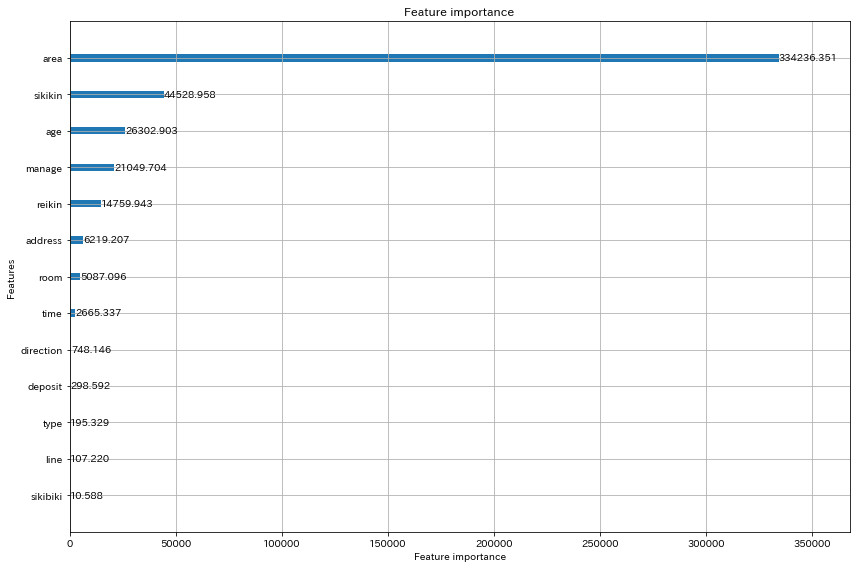

In [16]:
lgb.plot_importance(light, figsize=(12,8), max_num_features=50, importance_type='gain')
plt.tight_layout()
plt.show()

In [18]:
df2 = pd.read_csv('data/suumo_data.csv')

In [19]:
X2 = df2[[col for col in df2.columns if col not in ['price']]].drop("name",axis=1)

In [20]:
y2 = df2["price"]

In [21]:
pred2 = light.predict(X2)

In [22]:
prediction_s=pd.Series(pred2,name="prediction")
df2["difference"]=df2["price"]-prediction_s
df2["prediction"]=prediction_s
df2 = df2.reindex(columns=["name","price","prediction","difference"])
# お得物件top10を表示
df2.sort_values(by="difference",ascending=True).head(10)

,name,price,prediction,difference
14712,京成押上線 京成曳舟駅 3階建 築13年,7.90,11.967557,-4.067557
14124,東都向島コーポ 301号室,9.00,12.604816,-3.604816
7855,アーデル錦糸町,14.80,17.954012,-3.154012
2392,亀戸天神リリエンハイム,11.00,12.826999,-1.826999
7598,東京メトロ半蔵門線 押上駅 4階建 築53年,4.50,6.095209,-1.595209
1627,大内荘 310号室,4.50,6.095209,-1.595209
1626,大内荘 310号室,4.50,6.095209,-1.595209
2823,Forest Court,8.00,9.515798,-1.515798
10186,京成押上線 京成曳舟駅 5階建 新築,7.55,9.019725,-1.469725
1602,コーポスズキ,6.50,7.883567,-1.383567


In [23]:
train_pred = light.predict(X_train)

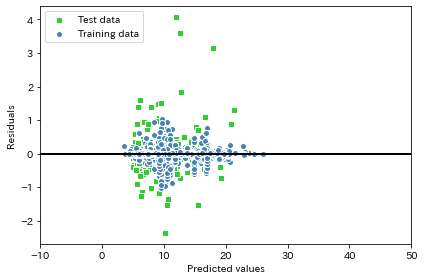

In [24]:

plt.scatter(pred,  pred - test_y,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.scatter(train_pred,  train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

In [25]:
# 検証データ
r2_score(test_y, pred)

0.994718008018605

In [26]:
# 検証データ
mean_squared_error(test_y, pred)

0.05185987504507043

In [27]:
import math
math.sqrt(mean_squared_error(test_y, pred))

0.2277276334682957

In [28]:
pred3=light.predict(X_val)

In [29]:
r2_score(y_val, pred3)

0.9966644242652062

In [30]:
mean_squared_error(y_val, pred3)

0.03364520057188759